In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

------------------------------
# DAC rationale 
------------------------------

### 1. Checking the sizing of Bipolar device with the operating point

In [2]:
bipo_current = pd.read_csv('icib_npnpnp.csv', skiprows=1, header=None) # No header
type(bipo_current)
bipo_current = bipo_current.to_numpy()
print(bipo_current.shape)

(201, 385)


In [3]:
num_bipo = np.arange(10,202,2)
print(np.size(num_bipo))
VBCE = bipo_current[:,0]
Ic_npn = bipo_current[:, 1:97]
Ib_npn = bipo_current[:, 97:193]
Ic_pnp = bipo_current[:, 193:289]  
Ib_pnp = bipo_current[:, 289:385] 

96


1. ploting gummel plot for npn

/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_20978/583282781.py:3: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(Ic_npn[:,i]*1e3, Ic_npn[:,i]/Ib_npn[:,i])#, label = f' m = {num_bipo[i]}' )
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_20978/583282781.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize=12)


Text(0.5, 1.0, 'Gummel Plot NPN ')

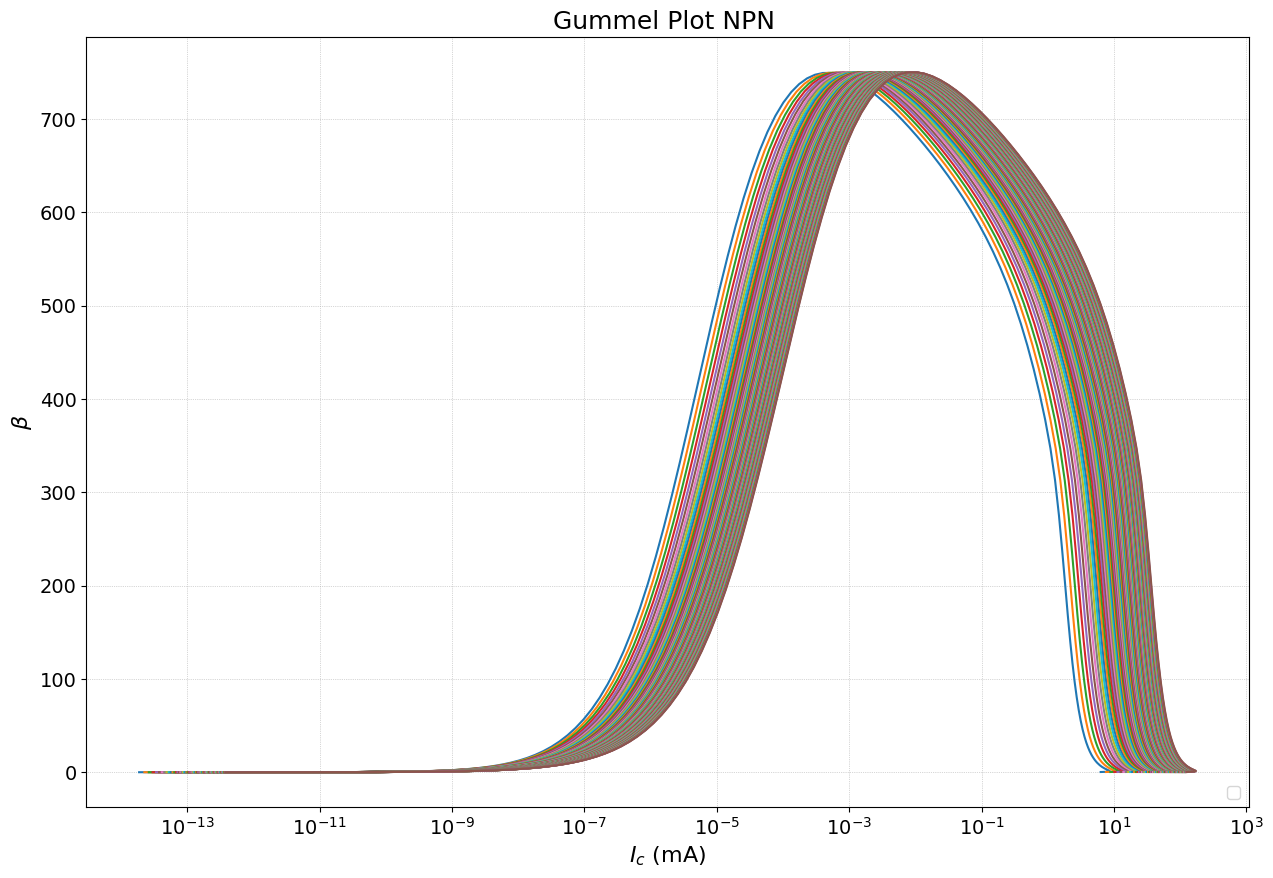

In [4]:

plt.figure(figsize = (15,10))
for i in range(len(num_bipo)):
    plt.semilogx(Ic_npn[:,i]*1e3, Ic_npn[:,i]/Ib_npn[:,i])#, label = f' m = {num_bipo[i]}' )
plt.xlabel(r'$I_c$ (mA)', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
plt.title('Gummel Plot NPN ', fontsize = 18)
# plt.xlim(0.9,1.1)
# plt.xlim(1.9,2.1)
# plt.xlim(2.9,3.1)

Plotting different beta when I = 1mA, 2 mA, 4mA

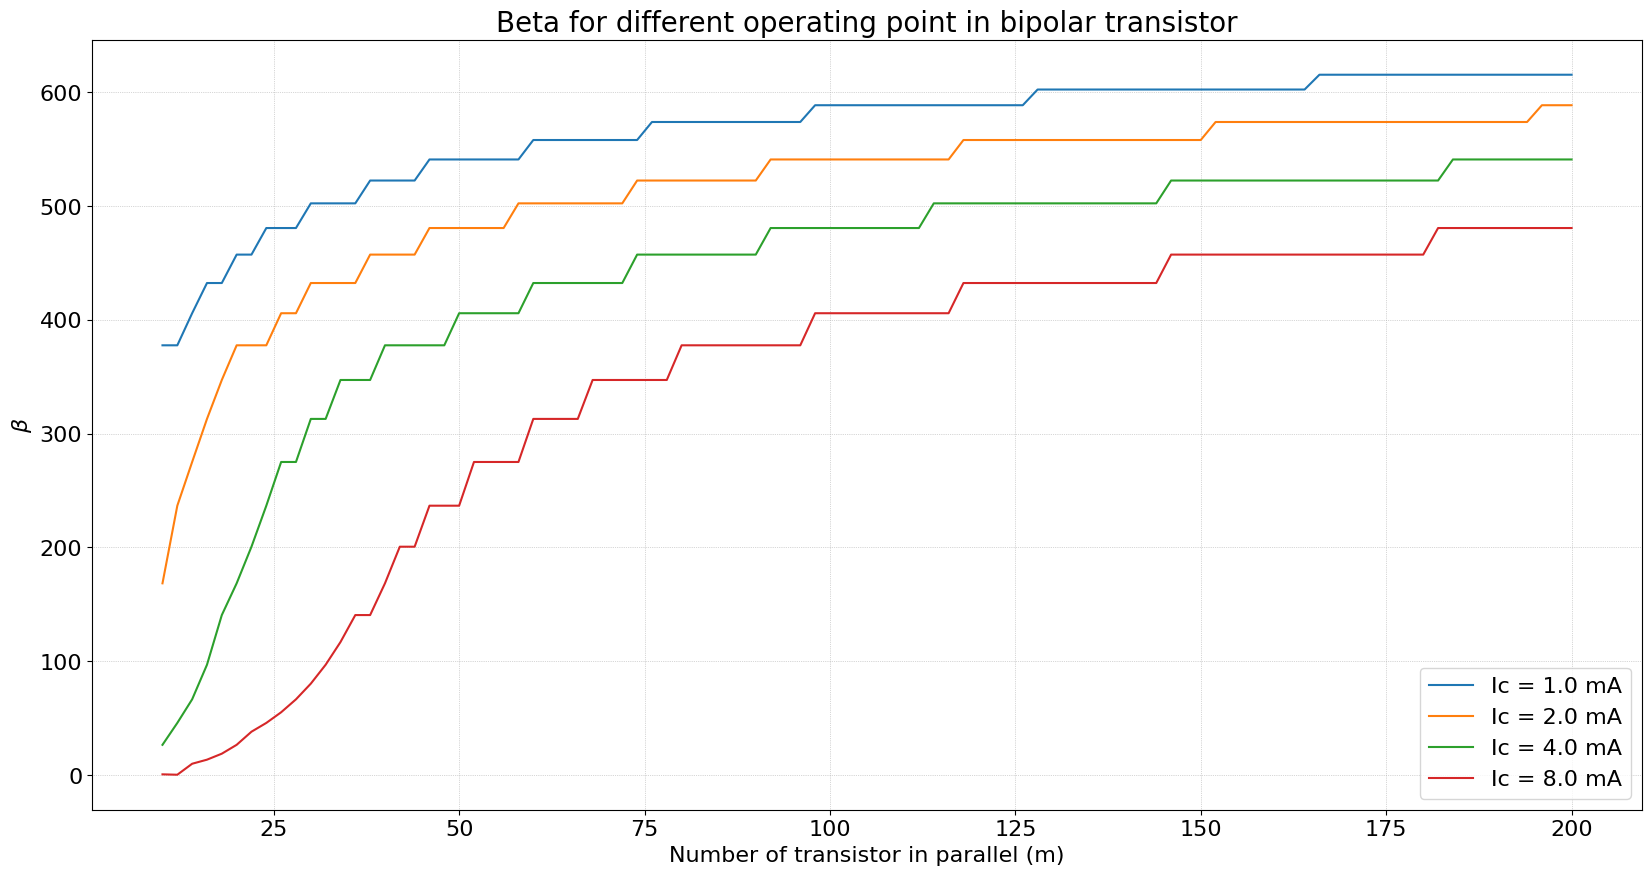

In [5]:
Ir = [1e-3, 2e-3, 4e-3, 8e-3]
def find_index(array, value):
    index = np.argmin(np.abs(array - value))
    return index
beta_Ir = [[],[],[],[]]
for i in range(len(Ir)):
    for j in range(96):
        ind = find_index(Ic_npn[:,j], Ir[i])
        # print('---------')
        # print(Ir[i])
        # print(ind)
        # print('---------')
        beta_Ir[i].append(Ic_npn[:,i][ind]/Ib_npn[:,i][ind])
plt.figure(figsize = (20,10))
for i in range(4):
    plt.plot(num_bipo, beta_Ir[i], label = f'Ic = {Ir[i] * 1e3} mA')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'$\beta$', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.xticks( fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.title('Beta for different operating point in bipolar transistor',fontsize = 20)
plt.savefig('beta_vs_npn.png')

2. Plot Gummel Plot for PNP

/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_20978/1841698931.py:3: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.abs(Ic_pnp[:,i])*1e3, Ic_pnp[:,i]/Ib_pnp[:,i] )
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_20978/1841698931.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize=12)


Text(0.5, 1.0, 'Gummel Plot NPN ')

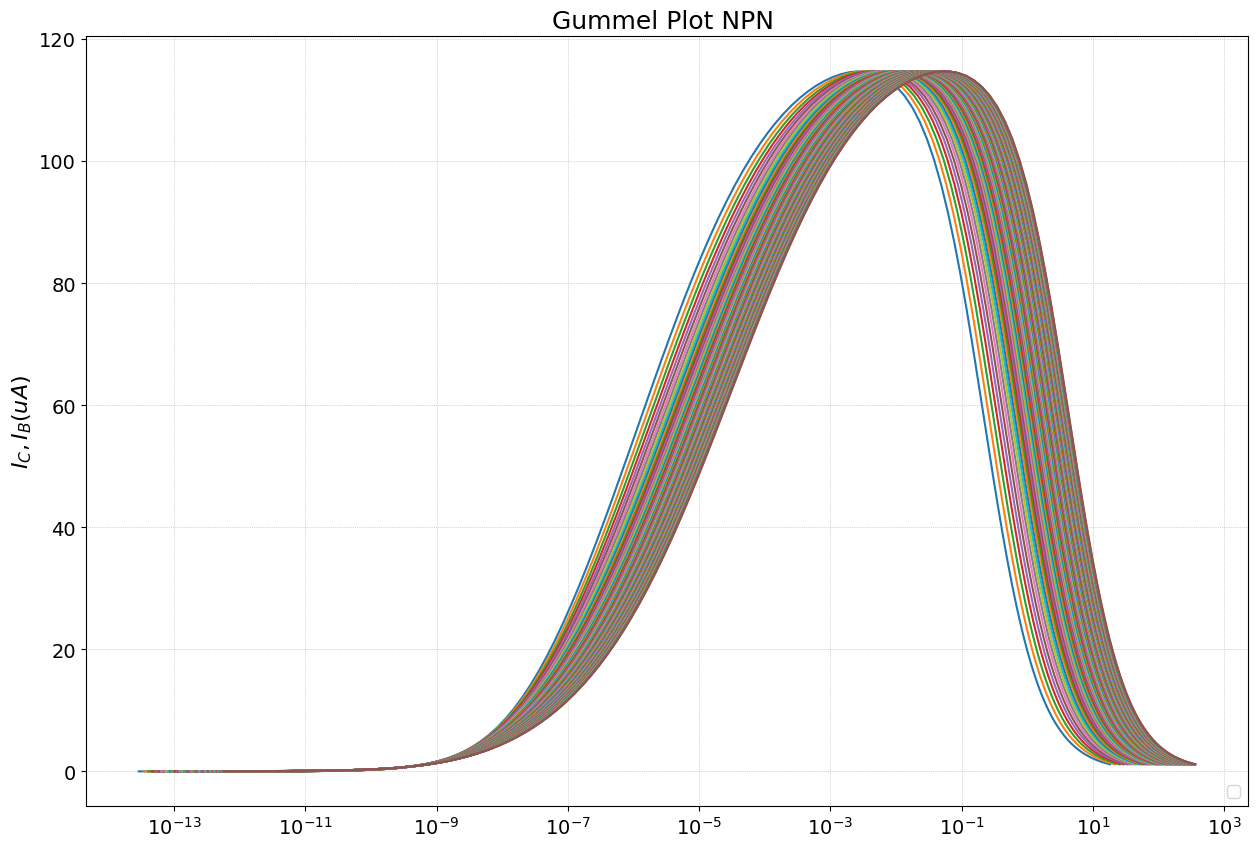

In [6]:
plt.figure(figsize = (15,10))
for i in range(len(num_bipo)):
    plt.semilogx(np.abs(Ic_pnp[:,i])*1e3, Ic_pnp[:,i]/Ib_pnp[:,i] )
    # plt.plot(Ic_pnp[:,i], 
# plt.xlabel(r'VBCE (V)', fontsize=16)
plt.ylabel(r'$I_C, I_B (uA)$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
plt.title('Gummel Plot NPN ', fontsize = 18)
# plt.xlim(0.6,0.8)

Text(0.5, 1.0, 'Beta for different operating point in bipolar transistor')

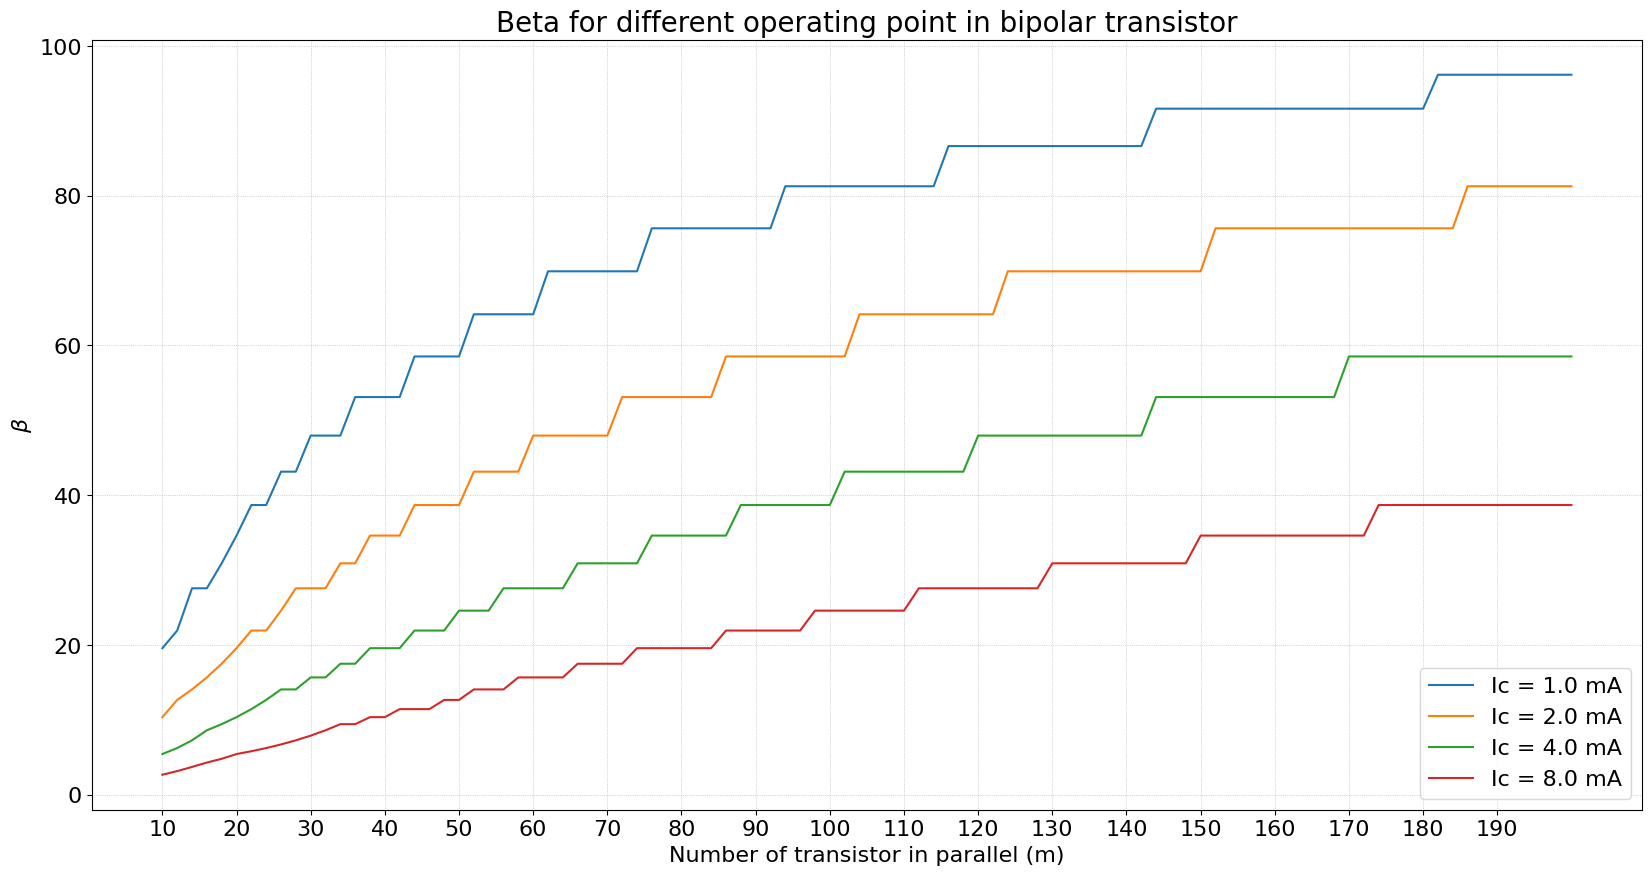

In [7]:
num_plot = np.arange(10,200,10)
beta_Ir1 = [[],[],[],[]]
for i in range(len(Ir)):
    for j in range(96):
        ind = find_index(np.abs(Ic_pnp[:,j]), Ir[i])
        # print('---------')
        # print(Ir[i])
        # print(ind)
        # print('---------')
        beta_Ir1[i].append(Ic_pnp[:,i][ind]/Ib_pnp[:,i][ind])
    
plt.figure(figsize = (20,10))
for i in range(4):
    plt.plot(num_bipo, beta_Ir1[i], label = f'Ic = {Ir[i] * 1e3} mA')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'$\beta$', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.xticks(num_plot, fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.title('Beta for different operating point in bipolar transistor',fontsize = 20)

## 2. Plot the DAC noise (simple case)

Simulation the simple current source and DAC configuration to check the **effectively rationale** of configuration compare to DAC's output noise 
1. Case 1 (1:M)
2. Case 2 (1/M : 1)

Both leads to the ratio of M when comparing the sizing of DAC to the right hand side compared to the left one

### 2.1. Simulation has done using subdivided PNP, NPN. In this case, we fix nnpn = 20, npnp = 22

In [8]:
noise1 = pd.read_csv('noise1.csv', skiprows=1, header=None) # No header
noise2 = pd.read_csv('noise2.csv', skiprows=1, header=None) # No header
noise3 = pd.read_csv('noise_wilson.csv', skiprows=1, header=None) # No header

M = 0.25
sqrt(S_i) =  478.76599999999996 pA/sqrt(Hz)
M = 0.5
sqrt(S_i) =  385.48900000000003 pA/sqrt(Hz)
M = 1
sqrt(S_i) =  320.29200000000003 pA/sqrt(Hz)
M = 2
sqrt(S_i) =  291.34900000000005 pA/sqrt(Hz)
M = 4
sqrt(S_i) =  287.54 pA/sqrt(Hz)


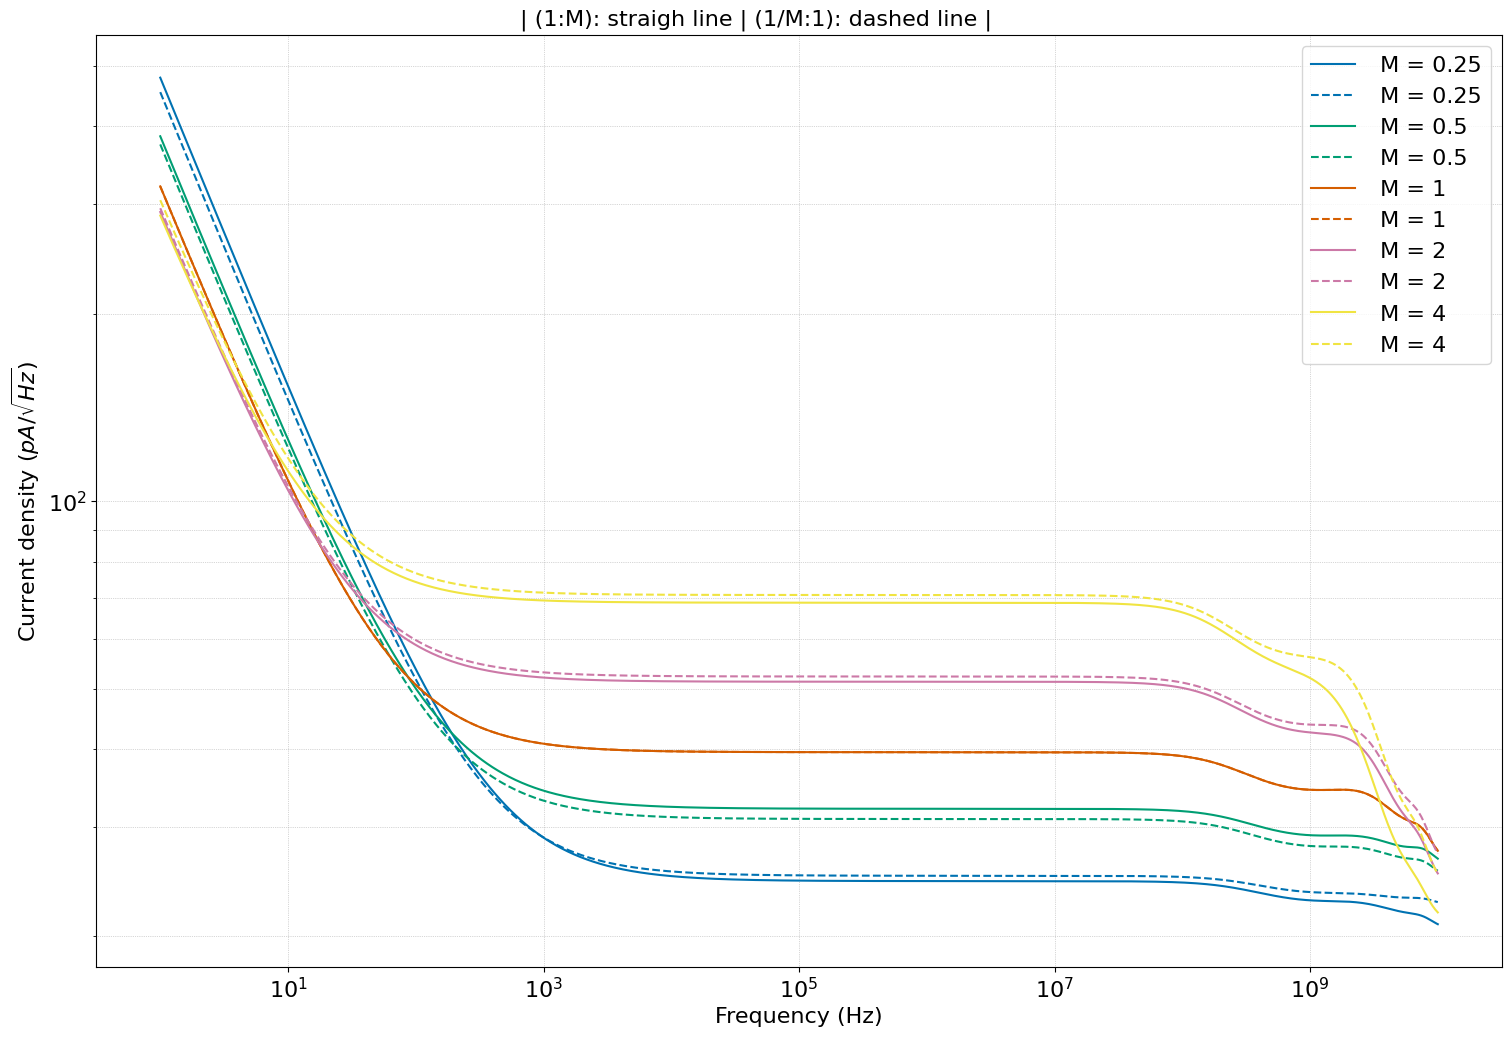

In [9]:
M = [0.25,0.5,1,2,4]
col = ["#0072B2", "#009E73", "#D55E00", "#CC79A7", "#F0E442", "#56B4E9"]
nnpn = 20
npnp = 22
El = 1
note = f'Nnpn = {nnpn}, Npnp = {npnp}, El = {El} um'
note = 'line = case 1, dashed = case 2'
plt.figure(figsize = (15,10), constrained_layout=True)

for i in range(len(M)):
    plt.loglog(noise1[0],noise1[i+1]*1e12, color = col[i], label = f' M = {M[i]}')
    print(f'M = {M[i]}')
    print(f'sqrt(S_i) =  {noise1[i+1][0]*1e12} pA/sqrt(Hz)')
    plt.loglog(noise2[0],noise2[i+1]*1e12, color = col[i], linestyle = 'dashed', label = f' M = {M[i]}')

plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 1, note , ha="center", fontsize=16, va="bottom") 

plt.savefig('noise_M.png')

Text(0.5, 1.0, 'Normalized Noise Waveforms for Varying Values of M')

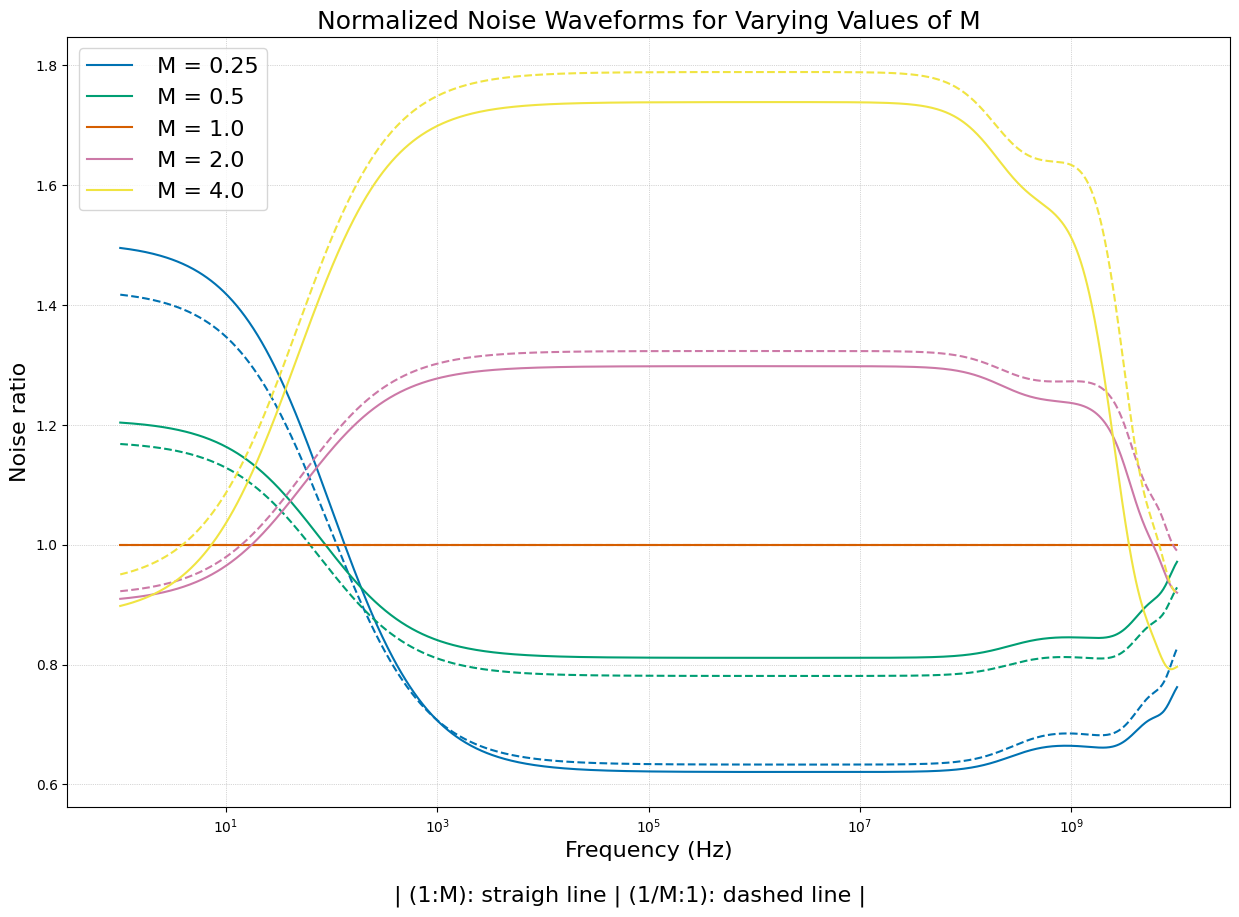

In [39]:
plt.figure(figsize = (15,10))
for i in range(len(M)):
    plt.semilogx(noise1[0],(noise1[i+1]/noise1[3]), color = col[i], label = f' M = {M[i]}')
    plt.semilogx(noise2[0],(noise2[i+1]/noise1[3]), linestyle = 'dashed', color = col[i])
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Noise ratio', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.legend(fontsize = 16)
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
plt.title('Normalized Noise Waveforms for Varying Values of M', fontsize = 18)
# plt.savefig('noise_ratio.png')

### 2.2 a. Fix value of pnp =  22 then varies number of npn

nnpn = [8,12,16,20,24,28,32,36,40]

In [12]:
noise_1 = pd.read_csv('noise1_pnp22_tot.csv', skiprows=1, header=None) # No header
noise_2 = pd.read_csv('noise2_pnp22_tot.csv', skiprows=1, header=None) # No header

In [69]:
nnpn = np.arange(8,202,4)
M = [0.25, 0.5, 1, 2, 4]
M = np.array(M)
n = np.linspace(1, 9, 9)


# Method 1: Using list comprehension
size = len(M)  # Number of empty lists you want
print(len(nnpn))
M_add1 = [[] for _ in range(size)]
M_add2 = [[] for _ in range(size)]
# print(null_array)  # Output: [[], [], [], [], []]


for i in range(size):
    for j in range(len(nnpn)):
        try:
            index = 1 + i + j * 5  # Calculate the index directly
            M_add1[i].append(noise_1[index])
            M_add2[i].append(noise_2[index])
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break


49


In [14]:
colors = [
    'red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'gold', 'lime'
]
# for i in range(5):
#     plt.figure(figsize = (15,10))
#     plt.title(f'M = {M[i]}')
#     for j in range(0,9):
#         # plt.semilogx(noise_1[0], M_add1[i][j]/M_add1[i][1], color = colors[j],  label = r' $n_{npn}$ = %.0d' %(nnpn[j]))
#         # plt.semilogx(noise_2[0], M_add2[i][j]/M_add2[i][1], color = colors[j], linestyle ='dashed')
#         plt.loglog(noise_1[0], M_add1[i][j]*1e12, color = colors[j],  label = r' $n_{npn}$ = %.0d' %(nnpn[j]))
#         plt.loglog(noise_2[0], M_add2[i][j]*1e12, color = colors[j], linestyle ='dashed')
#     plt.grid(which='both', linestyle=':', linewidth='0.5')
#     plt.ylabel(r'Noise current desity', fontsize=16)
#     plt.xlabel('Frequency (Hz)', fontsize=16)
#     plt.legend(fontsize = 16)
#     note =  '| (1:M): straigh line | (1/M:1): dashed line |'
#     # plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
    

### compare in fraction of noise variation 

Observe the variation in white noise region (f = 10MHz) and low noise region (f = 1 Hz) 

In [15]:
#1 Hz 
noise1Hz_1 = [[],[],[],[],[]]
noise10MHz_1 = [[],[],[],[],[]]
noise1Hz_2 = [[],[],[],[],[]]
noise10MHz_2 = [[],[],[],[],[]]
for i in range(5):
    for j in range(len(nnpn)):
        noise1Hz_1[i].append(M_add1[i][j][1])
        noise10MHz_1[i].append(M_add1[i][j][800])
        noise1Hz_2[i].append(M_add2[i][j][1])
        noise10MHz_2[i].append(M_add2[i][j][800])

Text(0.5, 1.0, 'Noise current density measured at 1Hz')

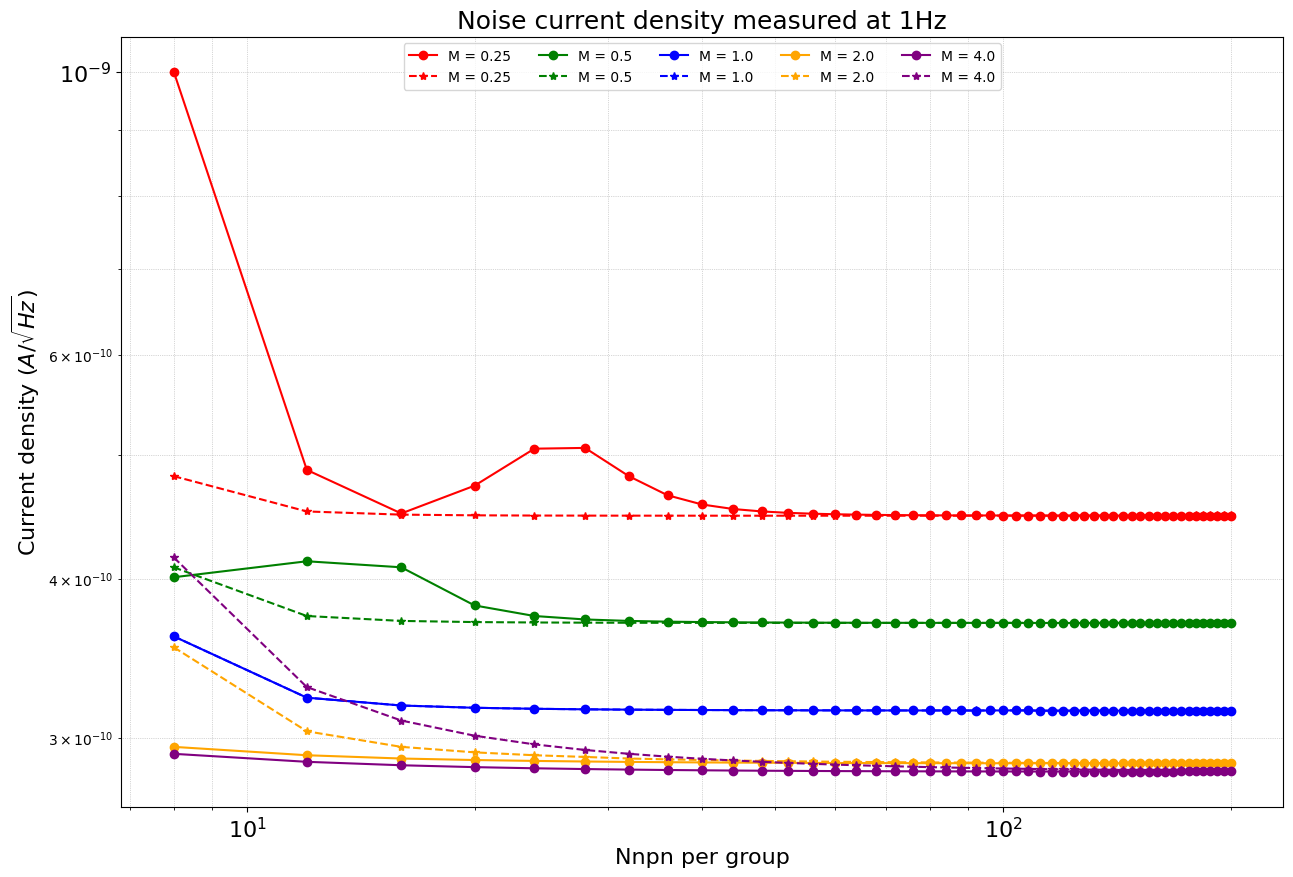

In [16]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.loglog(nnpn, noise1Hz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.loglog(nnpn, noise1Hz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 1Hz',fontsize = 18)
# note =  '| (1:M): straigh line | (1/M:1): dashed line |'
# plt.figtext(0.5, 1, note , ha="center", fontsize=16, va="bottom") 

Text(0.5, 1.0, 'Noise current density measured at 10MHz')

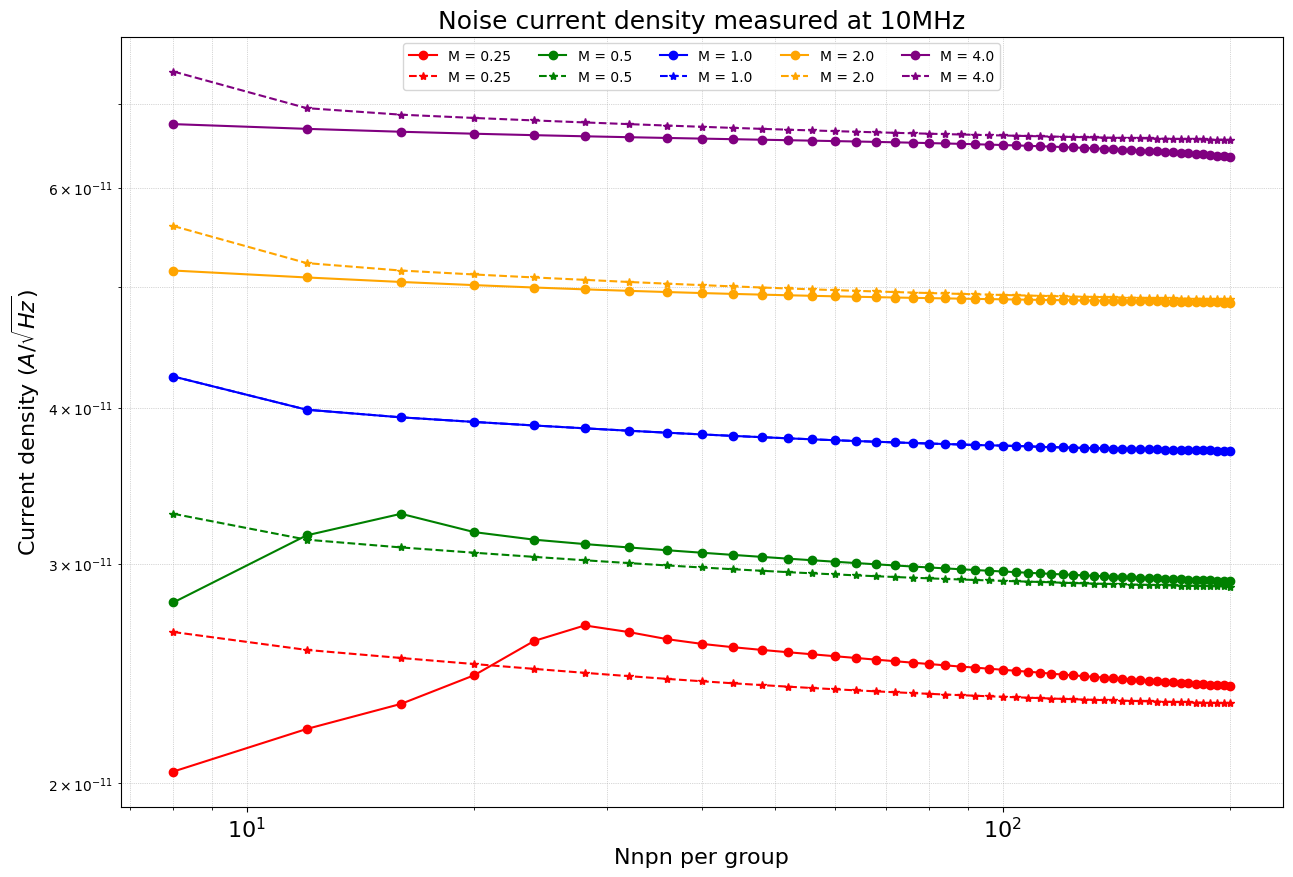

In [17]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.loglog(nnpn, noise10MHz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.loglog(nnpn, noise10MHz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks( fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 10MHz',fontsize = 18)

### 2. Analytical calculate the shot noise contribution


1. Ideal model consist only M and Iout

In [18]:
Iout = 1e-3 #A
 
q = 1.6e-19 #C

def white_noise1(M, Iout):
    Iref = Iout/M
    # return np.sqrt(3*(np.sqrt(M*2*q*Iout))**2 + 2*q*Iout)
    return np.sqrt(2*q*Iout*(3 * M + 1))
wn_analytic = white_noise1(M, Iout)



Text(0.5, 0.01, 'Analytical expression for shot noise: $i_c = \\sqrt{2qI_{out}} \\cdot \\sqrt{3M + 1}$')

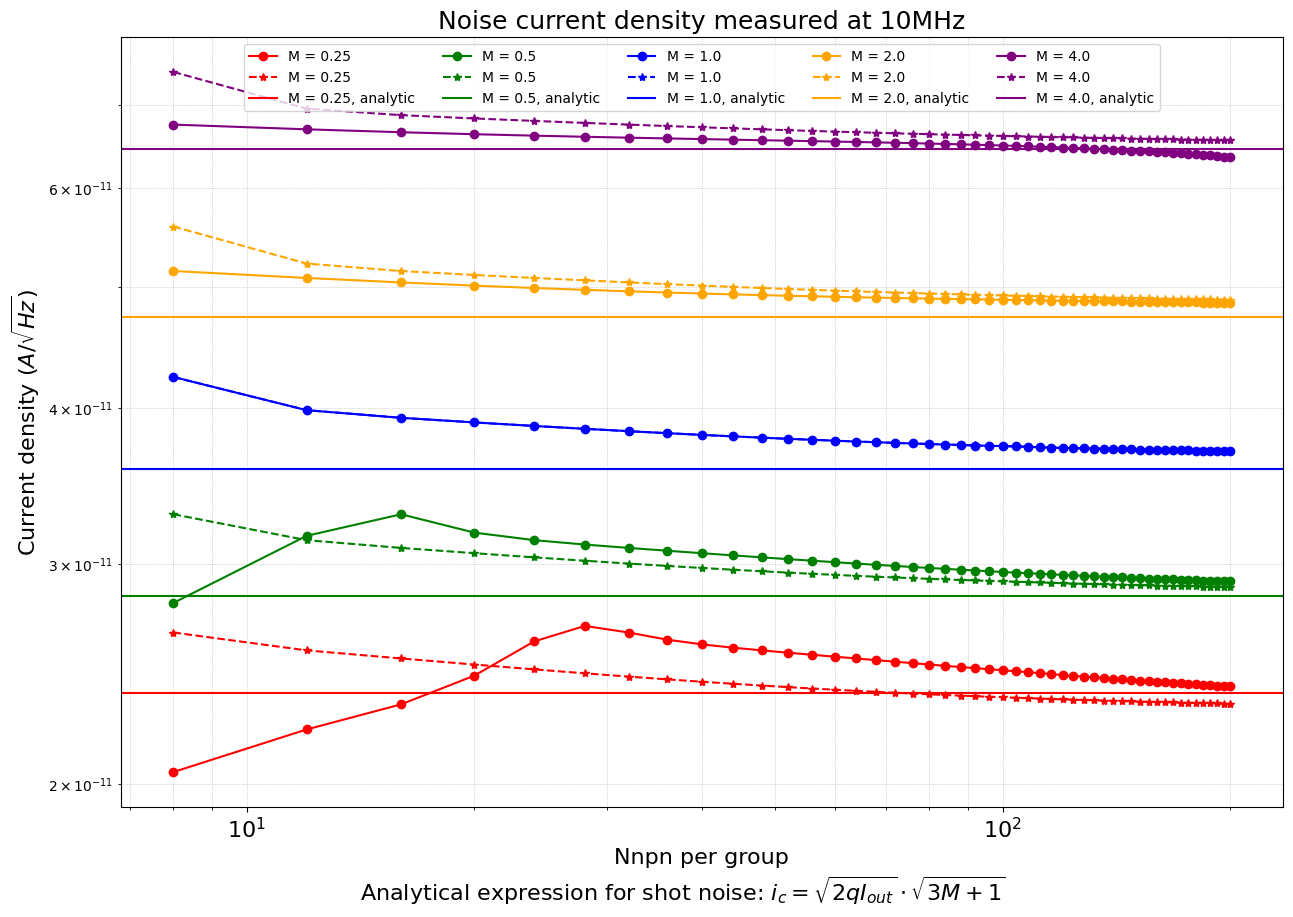

In [19]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.loglog(nnpn, noise10MHz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.loglog(nnpn, noise10MHz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
    plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 10MHz',fontsize = 18)
note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# plt.savefig('noise10MHz.png')

To verify the operation of these device, we will plot the output current 

2. Analytical model but using current measured in simulation

In [55]:
q = 1.6e-19

# Collector current measured from the simulation 
Ic_group = pd.read_csv('current1_to_shotnoise.csv', skiprows=1, header=None)
Ic_group2 = pd.read_csv('current2_to_shotnoise.csv', skiprows=1, header=None)
Ic_group = Ic_group.to_numpy()
Ic_group2 = Ic_group2.to_numpy()
# print(Ic_group)
# print(len(Ic_group[0]))
Ic_group = np.abs(Ic_group[0][1:len(Ic_group[0])])
Ic_group2 = np.abs(Ic_group2[0][1:len(Ic_group2[0])])
# print(len(Ic_group))
size1 = 5*len(nnpn)
# print(size1)
Iref = Ic_group[0:int(size1)]
Iref2 = Ic_group2[0:int(size1)]
# print(Iref[-1])
Ix =   Ic_group[int(size1):2*size1]
Ix2 =   Ic_group2[int(size1):2*size1]

# print(len(Ix))
Iout = Ic_group[int(2*size1):int(3*size1)]
Iout2 = Ic_group2[int(2*size1):int(3*size1)]
# print(Iout[0])
ishot = [[],[],[],[],[]]
ishot2 = [[],[],[],[],[]]
Iout_to_plot = [[],[],[],[],[]]
Iout_to_plot2 = [[],[],[],[],[]]
def white_noise_schema(Iref, Ix, Iout):
    # print(Iout/Ix)
    # return np.sqrt(2*q*((Iout/Ix)**2*(Iref + 2*Ix) + Iout))
    return np.sqrt( (Iout/Ix)**2 * (2 * q * (Iref + 2 * Ix)) + 2 * q * Iout)
    
shot_noise = (white_noise_schema(Iref, Ix, Iout))
shot = []
shot2 = []
for i in range(size1):
    shot.append(white_noise_schema(Iref[i], Ix[i], Iout[i]))
    shot2.append(white_noise_schema(Iref2[i], Ix2[i], Iout2[i]))
ishot2 = [[],[],[],[],[]]
ishot1 = [[],[],[],[],[]]
count = 0
# print(np.array(shot).shape)
for i in range(5):
    for j in range(size1):
        try:
            index =  i + j * 5  # Calculate the index directly
            ishot1[i].append(shot[index])
            ishot2[i].append(shot2[index])
            Iout_to_plot[i].append(Iout[index])
            Iout_to_plot2[i].append(Iout2[index])
            # M_add2[i].append(noise_2[index])
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break


Error: Index 245 out of range for noise_1
Error: Index 246 out of range for noise_1
Error: Index 247 out of range for noise_1
Error: Index 248 out of range for noise_1
Error: Index 249 out of range for noise_1


Text(0.5, 0.005, 'Analytical expression for shot noise:  $i_c = \\sqrt{(\\frac{I_{out}}{I_X})^2 (2q(I_{ref} + 2 I_X)) + 2qI_{out}}$')

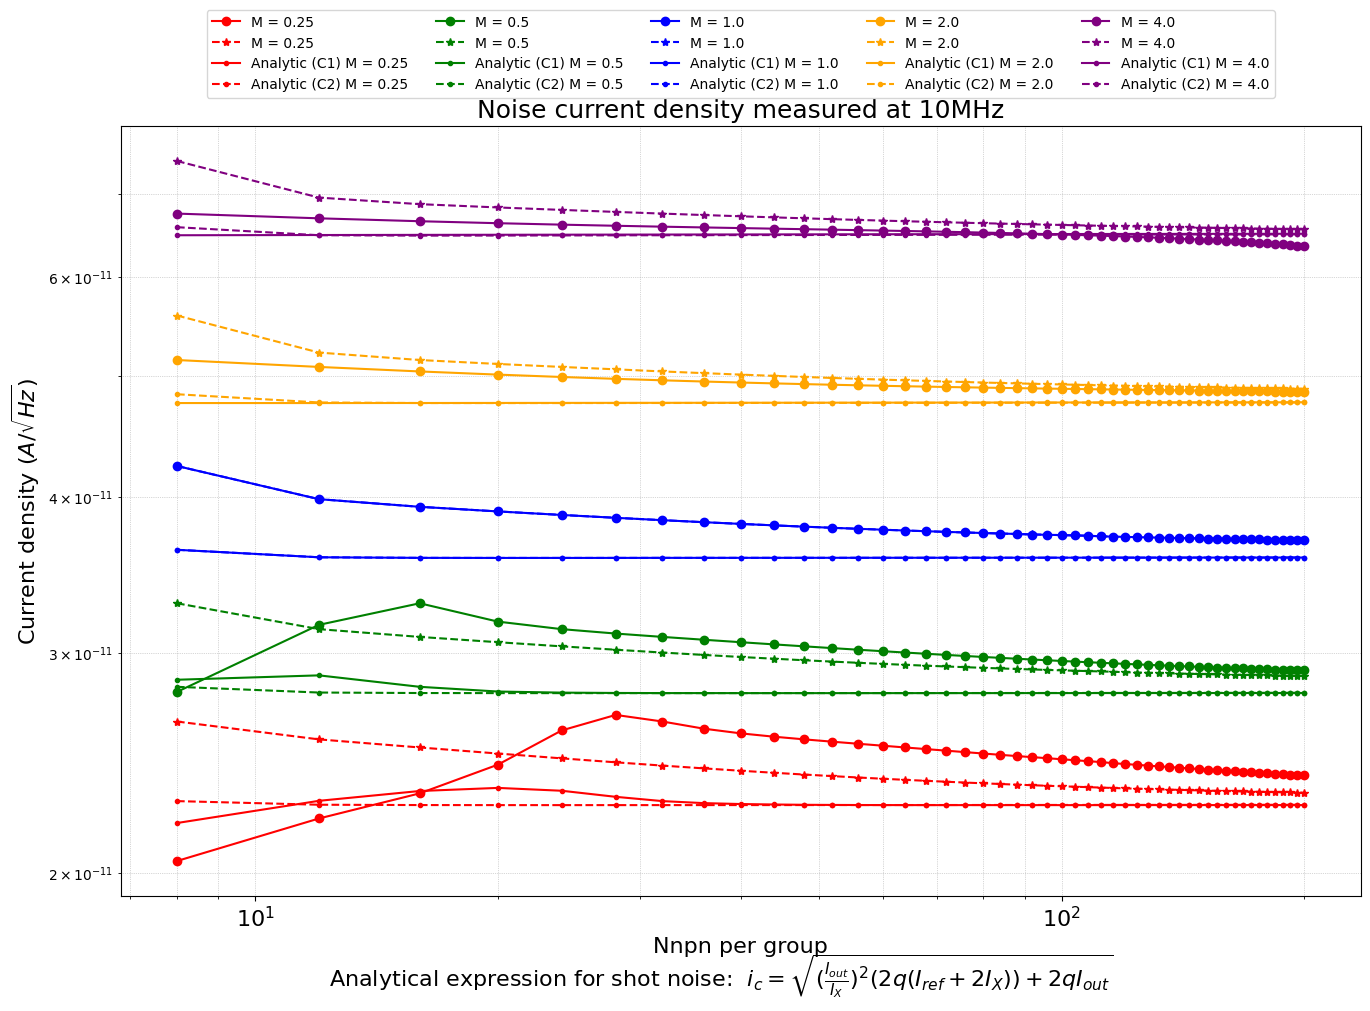

In [21]:
plt.figure(figsize = (16,10))
for i in range(5):
    plt.loglog(nnpn, noise10MHz_1[i], color=colors[i], marker='o', label=f'M = {M[i]}')
    plt.loglog(nnpn, noise10MHz_2[i], color=colors[i], marker='*', linestyle='dashed', label=f'M = {M[i]}')
    
    # Calculate the y-value for axhline outside the loop (if it's constant)
    # y_values = white_noise1(M[i], Iout)  # Get the array of y-values
    # plt.plot(nnpn, y_values, color=colors[i], label=f'(Model 1) M = {M[i]}') 
    plt.loglog(nnpn, ishot1[i],color = colors[i], marker = '.', label = f'Analytic (C1) M = {M[i]}')
    plt.loglog(nnpn, ishot2[i],color = colors[i], marker = '.',linestyle = 'dashed', label = f'Analytic (C2) M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks( fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.16)) 
plt.title('Noise current density measured at 10MHz',fontsize = 18)
note1 = r'Analytical expression for shot noise:'
note2 = r'$i_c = \sqrt{(\frac{I_{out}}{I_X})^2 (2q(I_{ref} + 2 I_X)) + 2qI_{out}}$'
note3 = r'$i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'
plt.figtext(0.5, 0.005, f'{note1}  {note2}', ha="center", fontsize=16, va="bottom")
# plt.savefig('noise10MHz.png')

Text(0.5, 0.01, '| (1:M): straigh line | (1/M:1): dashed line |')

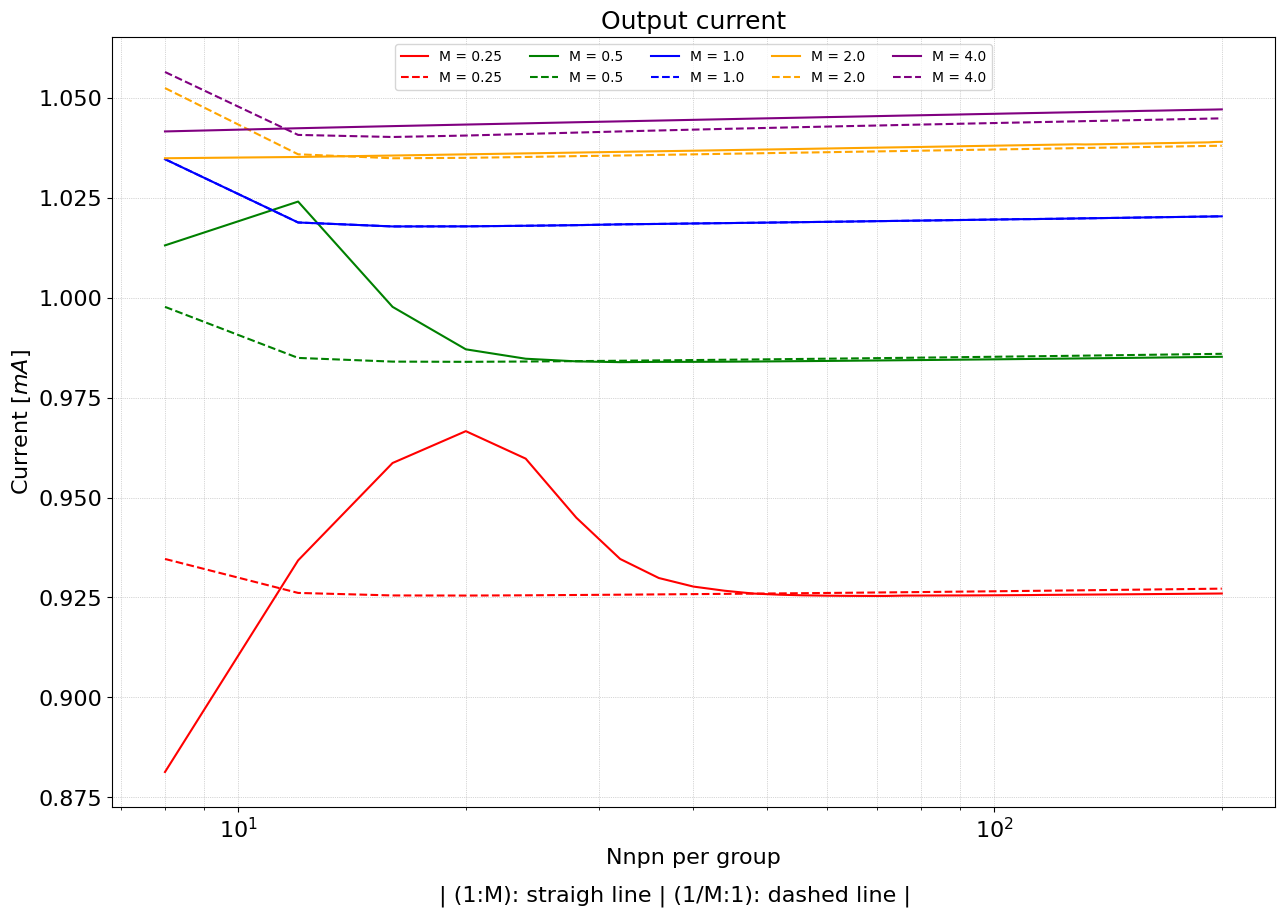

In [22]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.semilogx(nnpn, np.array(Iout_to_plot[i])*1e3,color = colors[i], label = f'M = {M[i]}')
    plt.semilogx(nnpn, np.array(Iout_to_plot2[i])*1e3,linestyle = 'dashed', color = colors[i], label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current [$mA$]', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Output current',fontsize = 18)
# note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# plt.savefig('noise10MHz.png')
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
# plt.savefig('Iout.png')

Text(0.5, 0.01, '| (1:M): straigh line | (1/M:1): dashed line |')

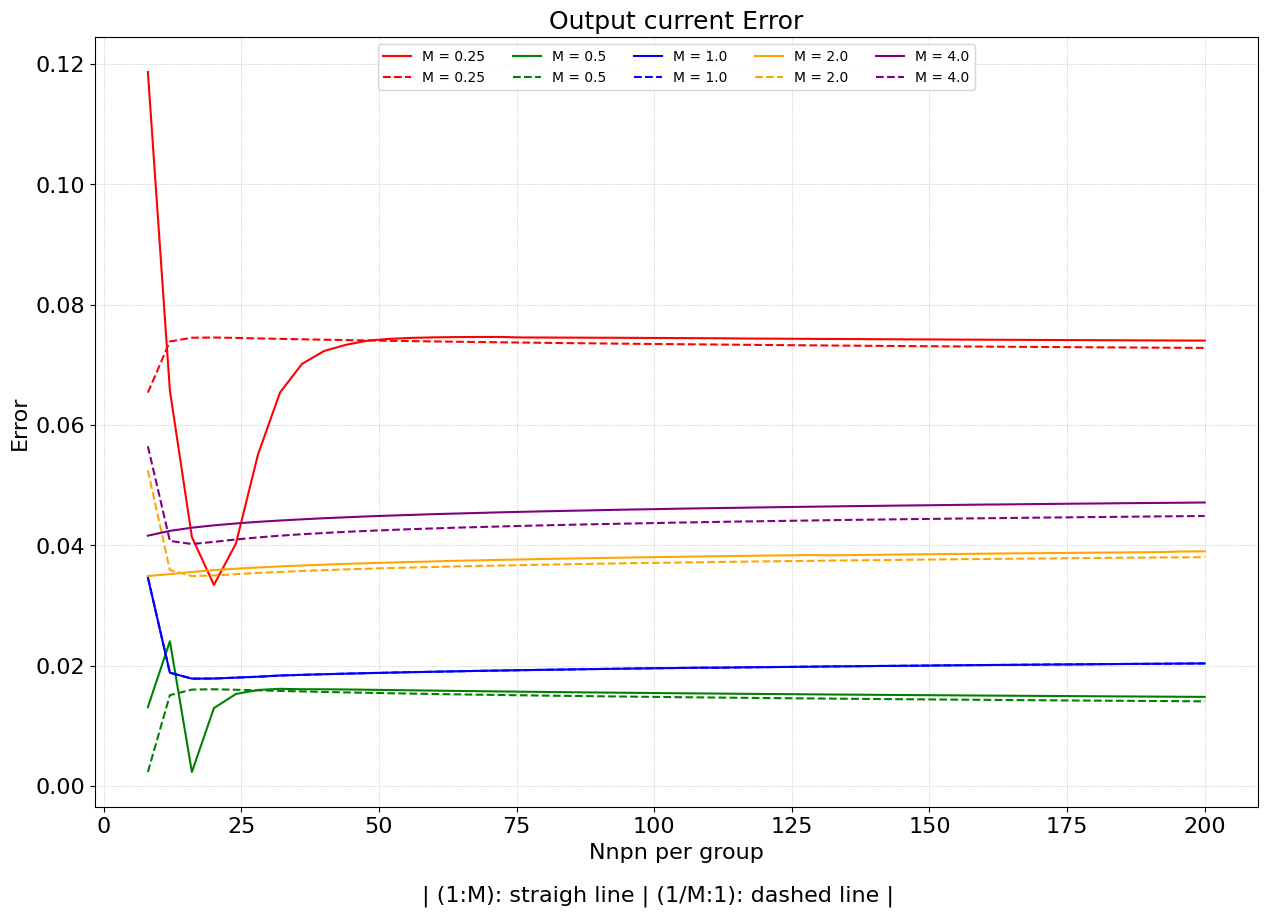

In [57]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.plot(nnpn, np.abs(np.array(Iout_to_plot[i])*1e3-1),color = colors[i], label = f'M = {M[i]}')
    plt.plot(nnpn, np.abs(np.array(Iout_to_plot2[i])*1e3-1),linestyle = 'dashed', color = colors[i], label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Error', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Output current Error',fontsize = 18)
# note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# plt.savefig('noise10MHz.png')
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
# plt.savefig('Iout.png')

### Selection to optimization 

In the optimization, it could be good to satisfy between circuit performance and noise performance. In our DAC simulation, the required output current is 1mA, so we cannot let the output current gone too far. 

We are going to choose only result that has less than 10% error. It means the output current must range from 0.9mA to 1.1mA 

$$ 0.9 [mA] < I_{out} < 1.1 [mA] $$

In [139]:
err_Iout1 = np.abs(np.array(Iout_to_plot)*1e3)
err_Iout2 = np.abs(np.array(Iout_to_plot2)*1e3-1)
ind1 = []
ind2 = []
# print(Iout_to_plot)
Iout_to_plot = np.array(Iout_to_plot).flatten()
Iout_to_plot2 = np.array(Iout_to_plot2).flatten()
# ind1 = np.where((Iout_to_plot > 0.9e-3) & (Iout_to_plot < 1.1e-3))
# print(ind1)
# print(Iout_to_plot)

Iout = np.array([Iout_to_plot, Iout_to_plot2]).flatten()*1e3
M_new = [np.ones(len(nnpn))*0.25, np.ones(len(nnpn))*0.5, np.ones(len(nnpn))*1,np.ones(len(nnpn))*2,np.ones(len(nnpn))*4]
M_new = [M_new, M_new]
M_new = np.array(M_new).flatten()
M_new = np.array(M_new)
n_new = [nnpn, nnpn, nnpn, nnpn, nnpn]
n_new = [n_new, n_new]
n_new = np.array(n_new).flatten()

# print(Iout)

ind = np.where((Iout > 0.9) & (Iout < 1.1))[0]
ind = np.array(ind)
ind1 = np.where((Iout < 0.95) & (Iout > 1.05))[0]
print(np.size(M_new[ind]))
print(np.size(n_new))
print(ind1)

489
490
[]


In [ ]:
# DAC = [0.3,0.11,0.2]
# Iref = [0.18,0.38,0.15]
# OP_driver_NPN = [0.12,0,0.06]
# OP_driver_PNP = [0.06,0.08, 0.25]
# Franout = [0.3,0,0.1]
# ver = ['V3', 'V4', 'V4.5']

In [46]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Make a list of lists, where each inner list contains the values for one parameter
# # (DAC, Iref, OP_driver_NPN, OP_driver_PNP, Franout) for all versions
# data = [[0.3, 0.11, 0.2],
#         [0.18, 0.38, 0.15],
#         [0.12, 0, 0.06],
#         [0.06, 0.08, 0.25],
#         [0.3, 0, 0.1]]

# # Make a DataFrame out of the data, with `ver` as the index and the parameter
# # names as the headers
# df = pd.DataFrame(data,
#                   index=['DAC', 'Iref', 'OP_driver_NPN', 'OP_driver_PNP', 'Franout'],
#                   columns=['V3', 'V4', 'V4.5'])

# # Transpose the DataFrame
# df = df.T

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# df.plot(kind='bar', ax=ax)

# # Set labels and title
# ax.set_xlabel('AwaXe Version')
# ax.set_ylabel('Flicker noise contribution at 1Hz')
# ax.set_title('Flicker noise contribution for different AwaXe version')

# # Add legend
# plt.legend(title='Quantity')

# # Save the plot
# plt.savefig('values_by_version_and_quantity_plt.png')

In [24]:
# plt.figure(figsize = (15,10))
# for i in range(5):
#     plt.plot(nnpn, np.array(Iout_to_plot[i])*1e3,color = colors[i], label = f' (C1) M = {M[i]}')
#     ind_beta = find_index(Ic_npn, Iout_to_plot[i])
    
#     plt.plot(nnpn, np.array(Iout_to_plot2[i])*1e3,linestyle = 'dashed', color = colors[i], label = f' (C2) M = {M[i]}')
# plt.grid(which='both', linestyle=':', linewidth='0.5')
# plt.ylabel(r'Current [$mA$]', fontsize=16)
# plt.xlabel('Nnpn per group', fontsize=16)
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
# plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
# plt.title('Output current',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# # plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# # plt.savefig('noise10MHz.png')
# note =  '| (1:M): straigh line | (1/M:1): dashed line |'
# plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

### 2.2 b. Fix value of pnp =  102 then varies number of npn

nnpn = [8,12,16,20,24,28,32,36,40]

In [25]:
noise_1_102 = pd.read_csv('noise1_pnp102.csv', skiprows=1, header=None) # No header
noise_2_102 = pd.read_csv('noise2_pnp102.csv', skiprows=1, header=None) # No header

In [26]:

M = np.array(M)
n = np.linspace(1, 9, 9)

M1_1 = []
M2_1 = []
M3_1 = []
M4_1 = []
M5_1 = []
M_add1_102 = [M1_1, M2_1, M3_1, M4_1, M5_1]
M1_2 = []
M2_2 = []
M3_2 = []
M4_2 = []
M5_2 = []
M_add2_102 = [M1_2, M2_2, M3_2, M4_2, M5_2]

for i in range(5):
    for j in range(9):
        try:
            index = 1 + i + j * 5  # Calculate the index directly
            M_add1_102[i].append(noise_1_102[index])
            M_add2_102[i].append(noise_2_102[index])
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break


In [27]:
#1 Hz 
noise1Hz_1_102   = [[],[],[],[],[]]
noise10MHz_1_102 = [[],[],[],[],[]]
noise1Hz_2_102   = [[],[],[],[],[]]
noise10MHz_2_102 = [[],[],[],[],[]]
for i in range(5):
    for j in range(9):
        noise1Hz_1_102[i].append(  M_add1_102[i][j][1])
        noise10MHz_1_102[i].append(M_add1_102[i][j][800])
        noise1Hz_2_102[i].append(  M_add2_102[i][j][1])
        noise10MHz_2_102[i].append(M_add2_102[i][j][800])

In [28]:
# plt.figure(figsize = (15,10))
# for i in range(5):
#     plt.semilogy(nnpn, noise10MHz_1_102[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
#     # plt.semilogy(nnpn, noise10MHz_2_102[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
#     plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
# plt.grid(which='both', linestyle=':', linewidth='0.5')
# plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
# plt.xlabel('Nnpn per group', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
# plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
# plt.title('Noise current density measured at 10MHz',fontsize = 18)
# note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# # plt.savefig('noise10MHz.png')

### Calculate surface area

In [29]:
Spnp = 9.49 * 8.5 #um^2 (can touch btrench?)
Snpn = 5.7 * 4.49 #um^2 doesn't count the infusion
def S1(M, nnpn):
    return 22 * Spnp * 2 +   nnpn * Snpn + M * nnpn * Snpn
def S2(M, nnpn):
    return 22 * Spnp * 2 +   nnpn * Snpn / M +  nnpn * Snpn

In [30]:
S1(0.5, 8)

3856.376

In [31]:
#calculate the surface area 
A1 = [[],[],[],[],[]]
A2 = [[],[],[],[],[]]
for i in range(5):
    for j in range(len(nnpn)):
        A1[i].append(S1(M[i], nnpn[j]))
        A2[i].append(S2(M[i], nnpn[j]))
        

Text(0.5, 0.01, '| (1:M): $\\bullet$ | (1/M:1): $\\blacktriangle$ |')

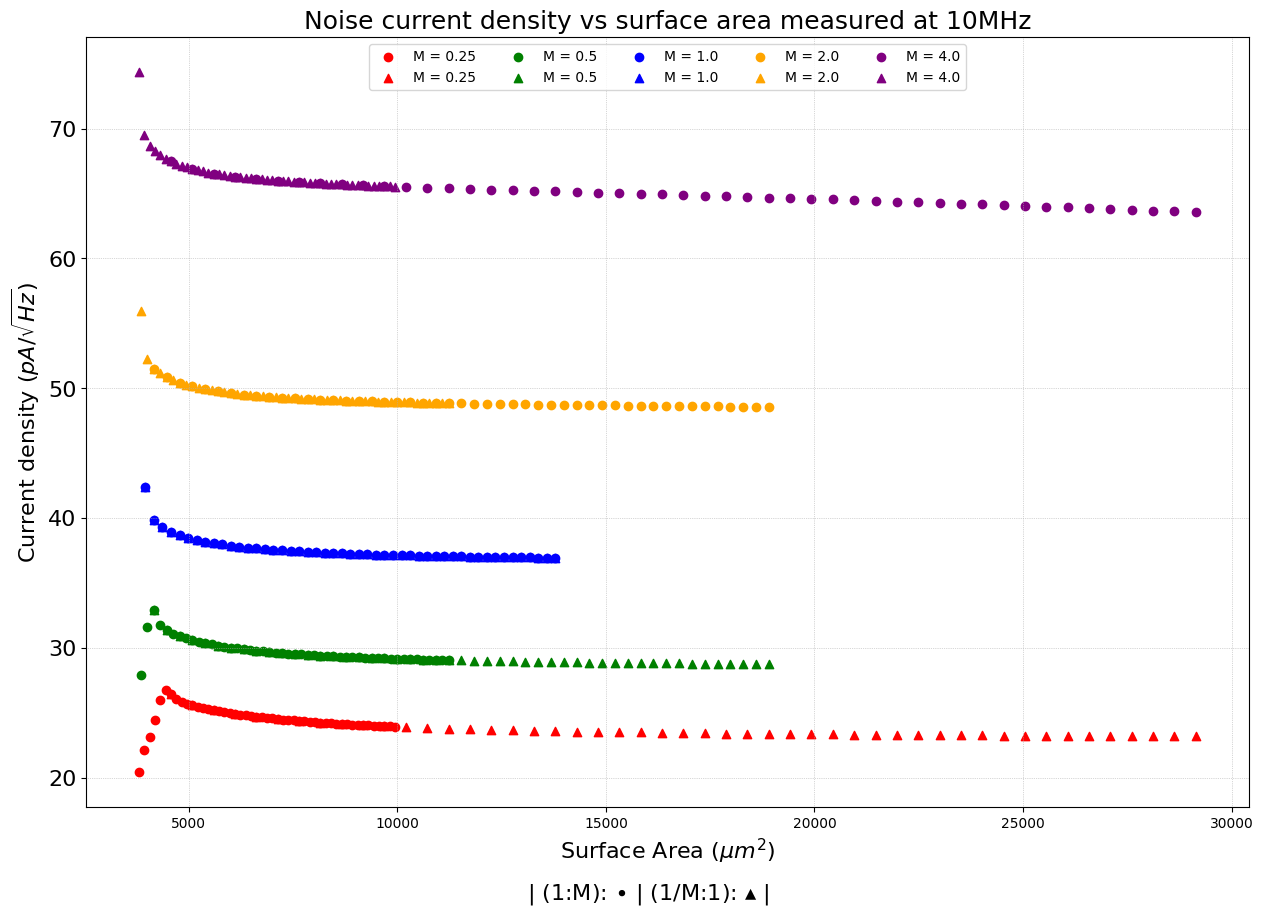

In [32]:
#scatter plot? 

plt.figure(figsize = (15,10))
for i in range(5):
    plt.scatter(A1[i], np.array(noise10MHz_1[i])*1e12,color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.scatter(A2[i], np.array(noise10MHz_2[i])*1e12,color = colors[i], marker = "^",  label = f'M = {M[i]}')
    # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density vs surface area measured at 10MHz',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

Text(0.5, 0.01, '| (1:M): $\\bullet$ | (1/M:1): $\\blacktriangle$ |')

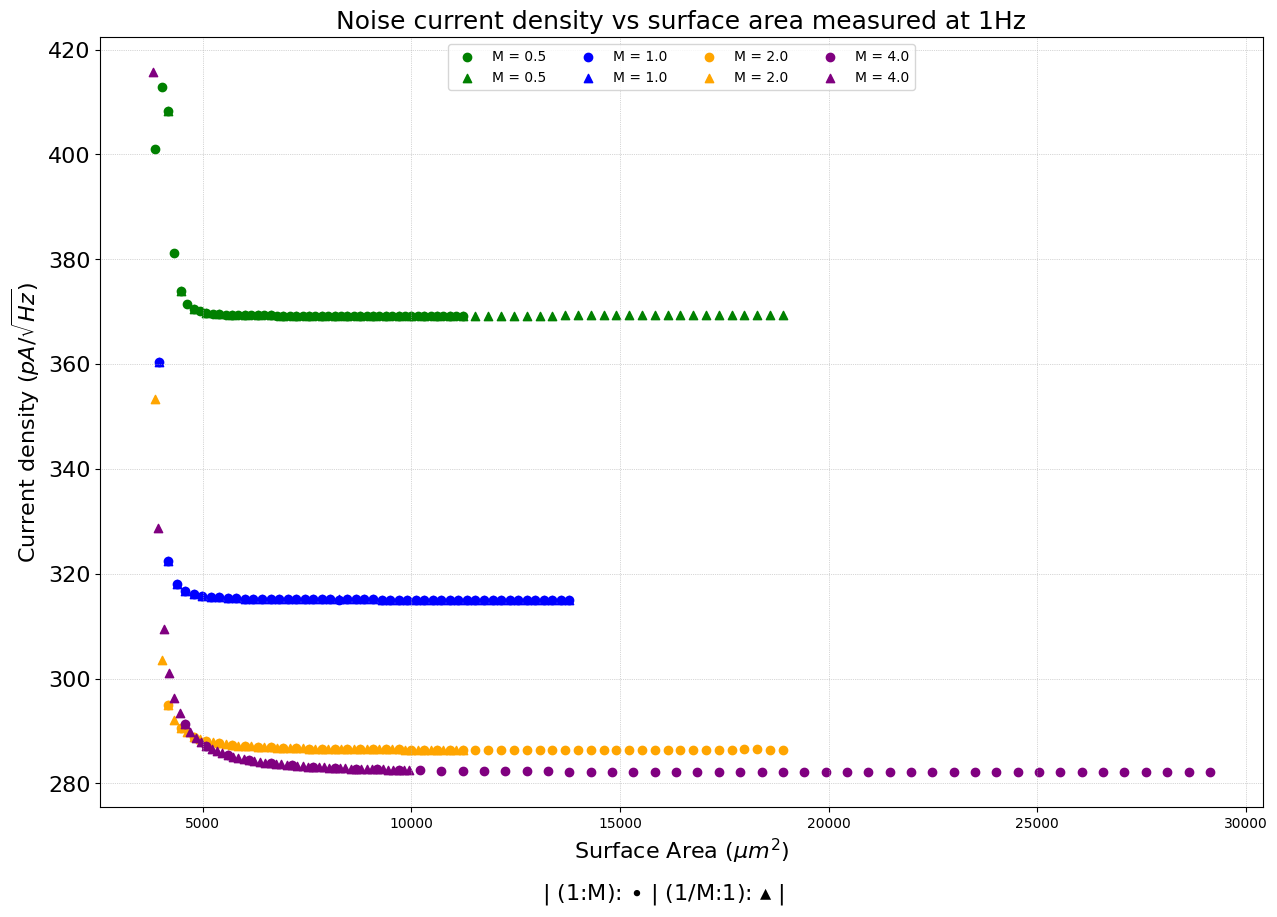

In [33]:
plt.figure(figsize = (15,10))
for i in range(1,5):
    plt.scatter(A1[i], np.array(noise1Hz_1[i])*1e12,color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.scatter(A2[i], np.array(noise1Hz_2[i])*1e12,color = colors[i], marker = "^",  label = f'M = {M[i]}')
    # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1)) 
plt.title('Noise current density vs surface area measured at 1Hz',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

NameError: name 'ranked_area' is not defined

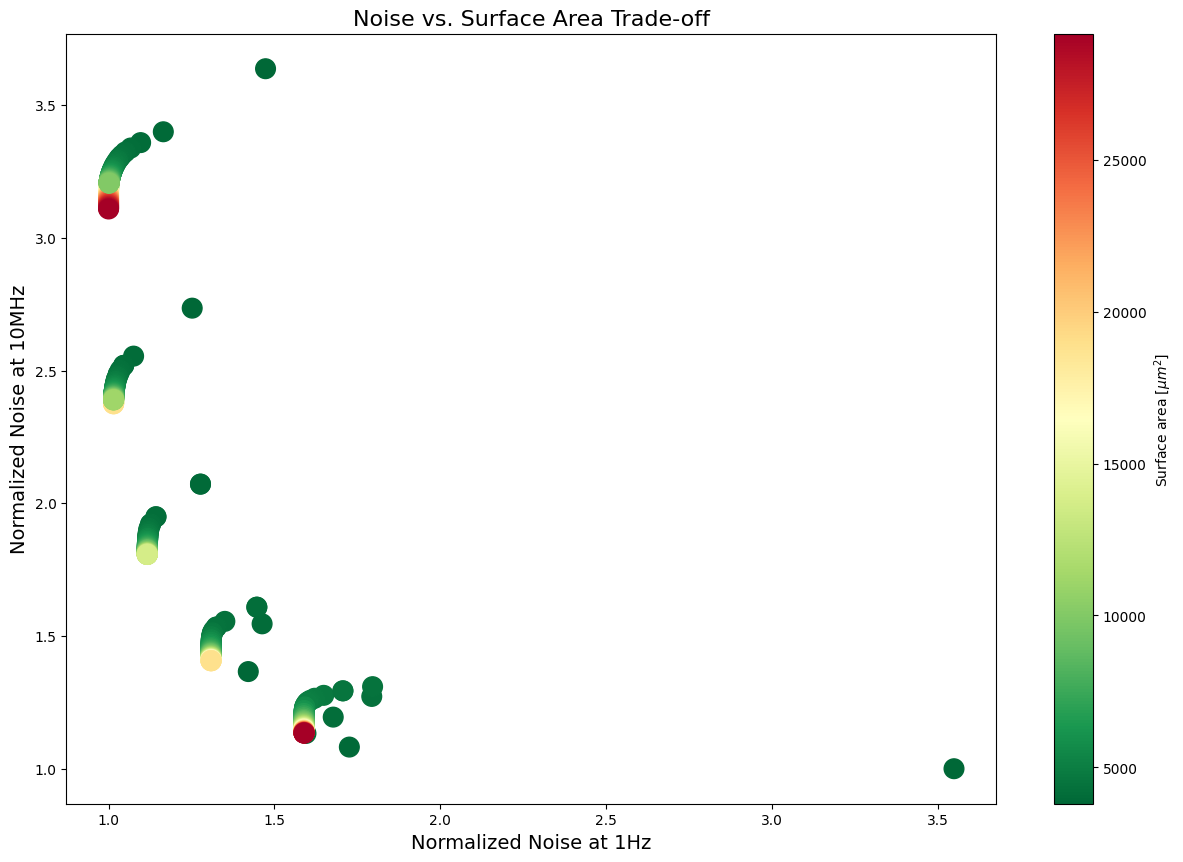

In [34]:
# Sample data (flatten data)
noise_1Hz = [noise1Hz_1, noise1Hz_2]
noise_1Hz = np.array(noise_1Hz).flatten() 

noise_10MHz = [noise10MHz_1, noise10MHz_2]
noise_10MHz = np.array(noise_10MHz).flatten()

area = [A1,A2]
area = np.array(area).flatten()

# Normalize the data
noise_1Hz_norm = noise_1Hz / np.min(noise_1Hz)
noise_10MHz_norm = noise_10MHz / np.min(noise_10MHz)
area_norm = area / np.min(area)

# Weights (adjust these based on your priorities)
w1 = 0.5  # Weight for noise at 1Hz   (we focuse on flicker noise)
w2 = 0.5  # Weight for noise at 10MHz 
# w3 = 0.3  # Weight for surface area

# Calculate the combined metric (weighted sum)
combined_metric = w1 * noise_1Hz_norm + w2 * noise_10MHz_norm

# Rank the data points (lower is better)
rank_indices = np.argsort(combined_metric)
ranked_noise_1Hz = noise_1Hz[rank_indices]
ranked_noise_10MHz = noise_10MHz[rank_indices]
# ranked_area = area[rank_indices]
# ranked_metric = combined_metric[rank_indices]

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(noise_1Hz_norm, noise_10MHz_norm, c=area, cmap='RdYlGn_r', s=200)
plt.colorbar(scatter, label=r'Surface area [$\mu m^2$] ')
plt.xlabel('Normalized Noise at 1Hz', fontsize=14)
plt.ylabel('Normalized Noise at 10MHz', fontsize=14)
plt.title('Noise vs. Surface Area Trade-off', fontsize=16)

# Annotate points with rank, surface area, and original index
for i, txt in enumerate(ranked_area):
    original_index = rank_indices[i]  # Get the original index
    # plt.annotate(f'{i+1} ({original_index})', 
                 # (noise_1Hz_norm[original_index], noise_10MHz_norm[original_index]), 
                 # textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
# plt.xlim(1,2)
plt.grid(True)
# plt.savefig('Noise_optimize.png')
plt.show()

# Print ranked data with original index
print("Ranked Data:")
best_index = rank_indices[0]  # Get the original index of the best-ranked solution
print(f"The best-ranked solution is at index: {best_index}")

for i in range(len(ranked_metric)):
    original_index = rank_indices[i]
    print(f"Rank {i+1} (Index: {original_index}): Noise 1Hz = {ranked_noise_1Hz[i]*1e12:.2e} pA/sqrt(Hz), Noise 10MHz = {ranked_noise_10MHz[i]*1e12:.2e} pA/sqrt(Hz)")


(490,)


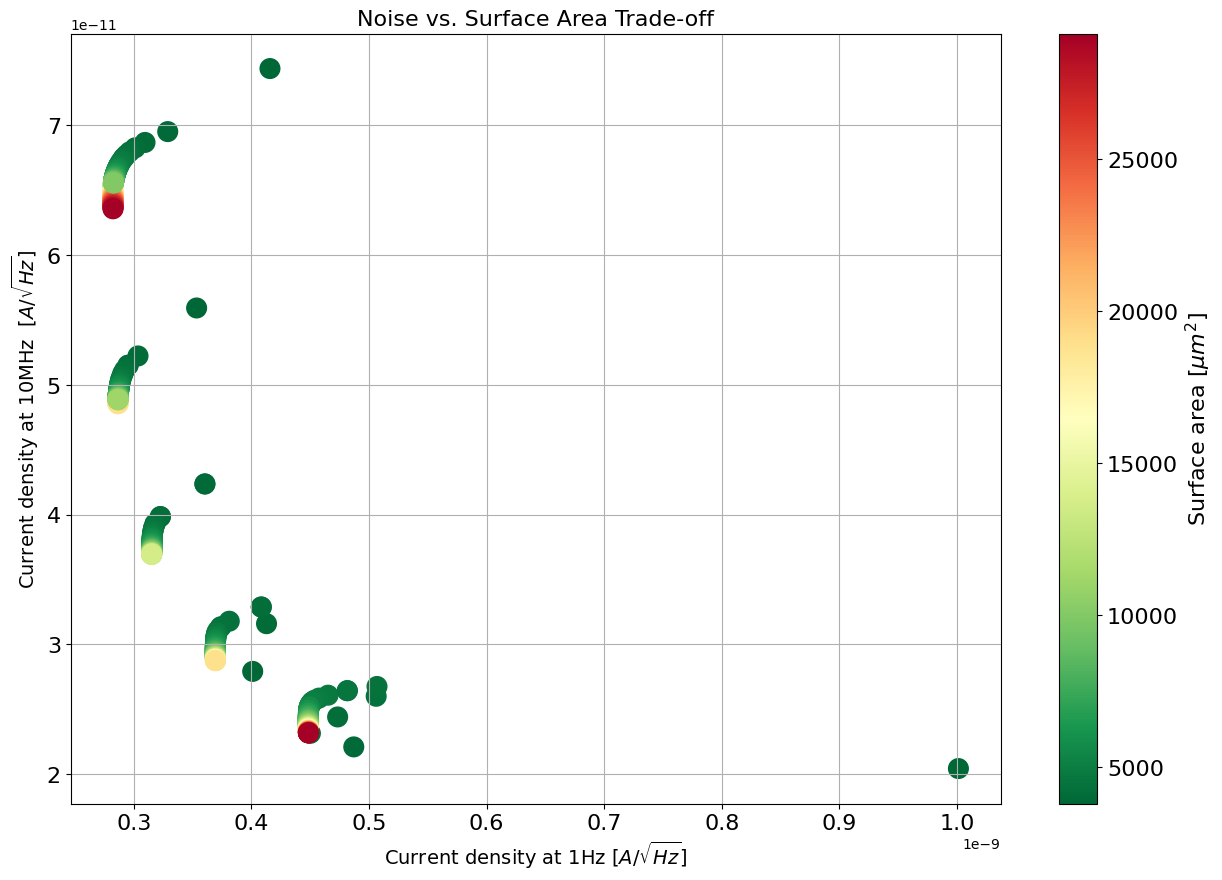

In [141]:
plt.figure(figsize = (15,10))
# plt.scatter(noise_1Hz, noise_10MHz)
scatter = plt.scatter(noise_1Hz, noise_10MHz, c=area, cmap='RdYlGn_r', s=200)
print(noise_1Hz.shape)
cbar = plt.colorbar(scatter, label=r'Surface area [$\mu m^2$]')
cbar.ax.tick_params(labelsize=16)  # Set the font size of the colorbar ticks
cbar.ax.set_ylabel(r'Surface area [$\mu m^2$]', fontsize=16)  # Set the font size of the colorbar label
plt.xlabel(r'Current density at 1Hz [$A/\sqrt{Hz}$]', fontsize=14)
plt.ylabel('Current density at 10MHz  [$A/\sqrt{Hz}$]', fontsize=14)
plt.title('Noise vs. Surface Area Trade-off', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.xlim(1,2)
plt.grid(True)
plt.savefig('Noise_optimize.png')

In [142]:
# noise_square_1 = noise_1
# noise_square_2 = noise_2
# for i in range(1,45):
#     noise_square_1[i] = noise_square_1[i]**2
#     noise_square_2[i] = noise_square_2[i]**2
# print(noise_square_1)

### Comparing the RMS value 

In [143]:
def integral(frequency, data):
    S = 0
    for i in range(1,len(frequency)):
        S = S + 0.5 * (data[i-1]**2 + data[i]**2) * (frequency[i] - frequency[i-1])
    return S 


In [144]:
print(type(noise_1))

<class 'pandas.core.frame.DataFrame'>


1. Calculate from 1 to 1000 Hz

In [145]:

def integral(frequency, data):
    S = 0
    for i in range(1, len(frequency)):
        S = S + 0.5 * (data[i-1]**2 + data[i]**2) * (frequency[i] - frequency[i-1])
    return S

RMS_1_11000 = [[], [], [], [], []]
RMS_2_11000 = [[], [], [], [], []]
size1 = 245

for i in range(5):
    for j in range(size1):
        try:
            index = 1 + i + j * 5
            # Assuming the first column (index 0) is frequency in both DataFrames
            RMS_1_11000[i].append(integral(noise_1[0][0:300], noise_1[index][0:300]))  
            RMS_2_11000[i].append(integral(noise_2[0][0:300], noise_2[index][0:300])) 

        except (IndexError, KeyError) as e:
            print(f"Error accessing data: {e}")
            break
RMS_11000 = np.array([RMS_1_11000,RMS_2_11000]).flatten()

Error accessing data: 246
Error accessing data: 247
Error accessing data: 248
Error accessing data: 249
Error accessing data: 250


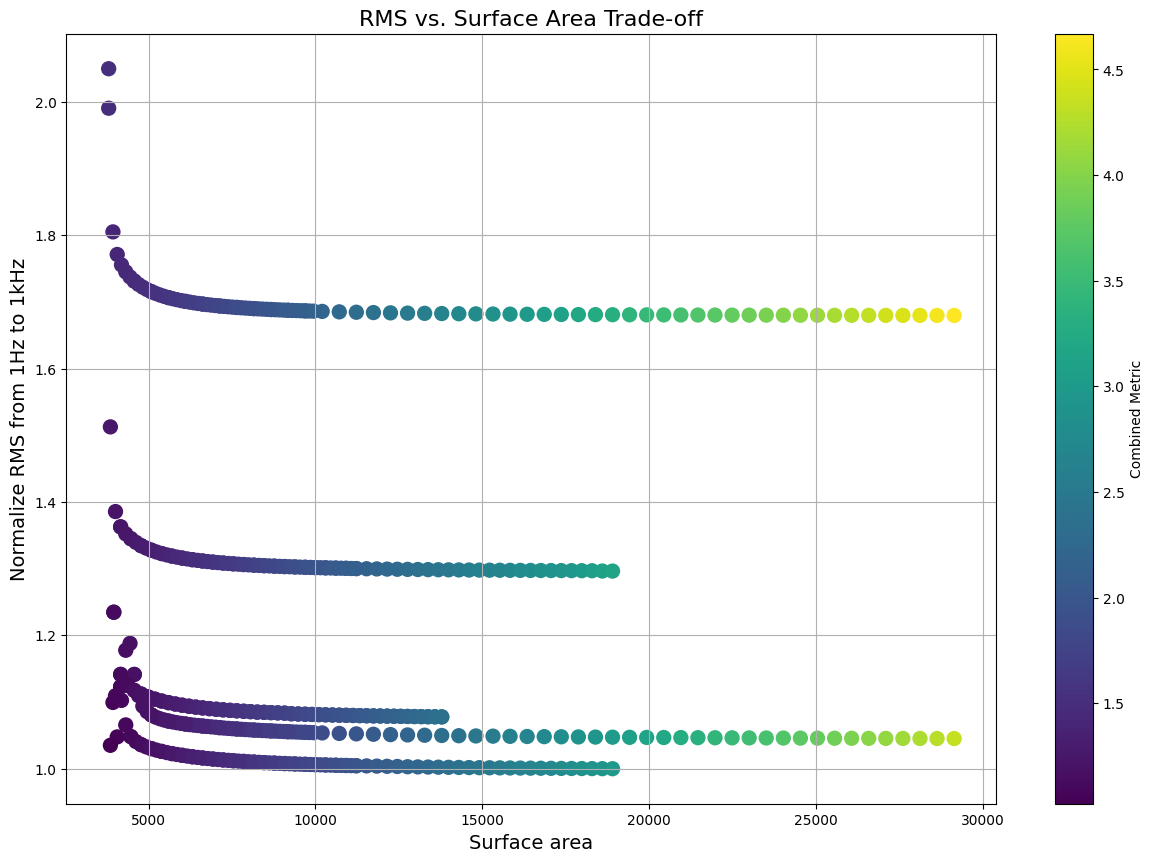

Ranked Data:
The best-ranked solution is at index: 49
Rank 1 (Index: 49): RMS = 1.38e-09 A, normalise_RMS = 1.04e+00, Area = 3856.4 um^2, normalised area = 1.0
Rank 2 (Index: 2): RMS = 1.40e-09 A, normalise_RMS = 1.05e+00, Area = 4061.1 um^2, normalised area = 1.1
Rank 3 (Index: 1): RMS = 1.47e-09 A, normalise_RMS = 1.10e+00, Area = 3933.2 um^2, normalised area = 1.0
Rank 4 (Index: 50): RMS = 1.48e-09 A, normalise_RMS = 1.11e+00, Area = 4009.9 um^2, normalised area = 1.1
Rank 5 (Index: 52): RMS = 1.42e-09 A, normalise_RMS = 1.07e+00, Area = 4317.1 um^2, normalised area = 1.1
Rank 6 (Index: 3): RMS = 1.47e-09 A, normalise_RMS = 1.10e+00, Area = 4189.1 um^2, normalised area = 1.1
Rank 7 (Index: 51): RMS = 1.50e-09 A, normalise_RMS = 1.12e+00, Area = 4163.5 um^2, normalised area = 1.1
Rank 8 (Index: 294): RMS = 1.50e-09 A, normalise_RMS = 1.12e+00, Area = 4163.5 um^2, normalised area = 1.1
Rank 9 (Index: 295): RMS = 1.40e-09 A, normalise_RMS = 1.05e+00, Area = 4470.6 um^2, normalised area

In [146]:
# Normalize the data
RMS = np.sqrt(RMS_11000)
RMS_norm = RMS / np.min(RMS)
# Calculate the combined metric (weighted sum)
w1 = 0.5
w2 = 0.5
combined_metric = w1 * RMS_norm + w2 * area_norm

# Rank the data points (lower is better)
rank_indices = np.argsort(combined_metric)
ranked_RMS = RMS[rank_indices]
ranked_area = area[rank_indices]
ranked_metric = combined_metric[rank_indices]

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(area, RMS_norm, c=combined_metric, cmap='viridis', s=100)
plt.colorbar(scatter, label='Combined Metric')
plt.xlabel('Surface area', fontsize=14)
plt.ylabel('Normalize RMS from 1Hz to 1kHz', fontsize=14)
plt.title('RMS vs. Surface Area Trade-off', fontsize=16)

# Annotate points with rank, surface area, and original index
for i, txt in enumerate(ranked_area):
    original_index = rank_indices[i]  # Get the original index
    plt.annotate(f'{i+1} ({original_index})', 
                 (RMS[original_index], noise_10MHz_norm[original_index]), 
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
# plt.xlim(1,2)
plt.grid(True)
plt.show()

# Print ranked data with original index
print("Ranked Data:")
best_index = rank_indices[0]  # Get the original index of the best-ranked solution
print(f"The best-ranked solution is at index: {best_index}")

for i in range(len(ranked_metric)):
    original_index = rank_indices[i]
    print(f"Rank {i+1} (Index: {original_index}): RMS = {ranked_RMS[i]:.2e} A, normalise_RMS = {(ranked_RMS[i]/min(RMS)):.2e}, Area = {ranked_area[i]:.1f} um^2, normalised area = {(ranked_area[i]/(min(area))):.1f}")

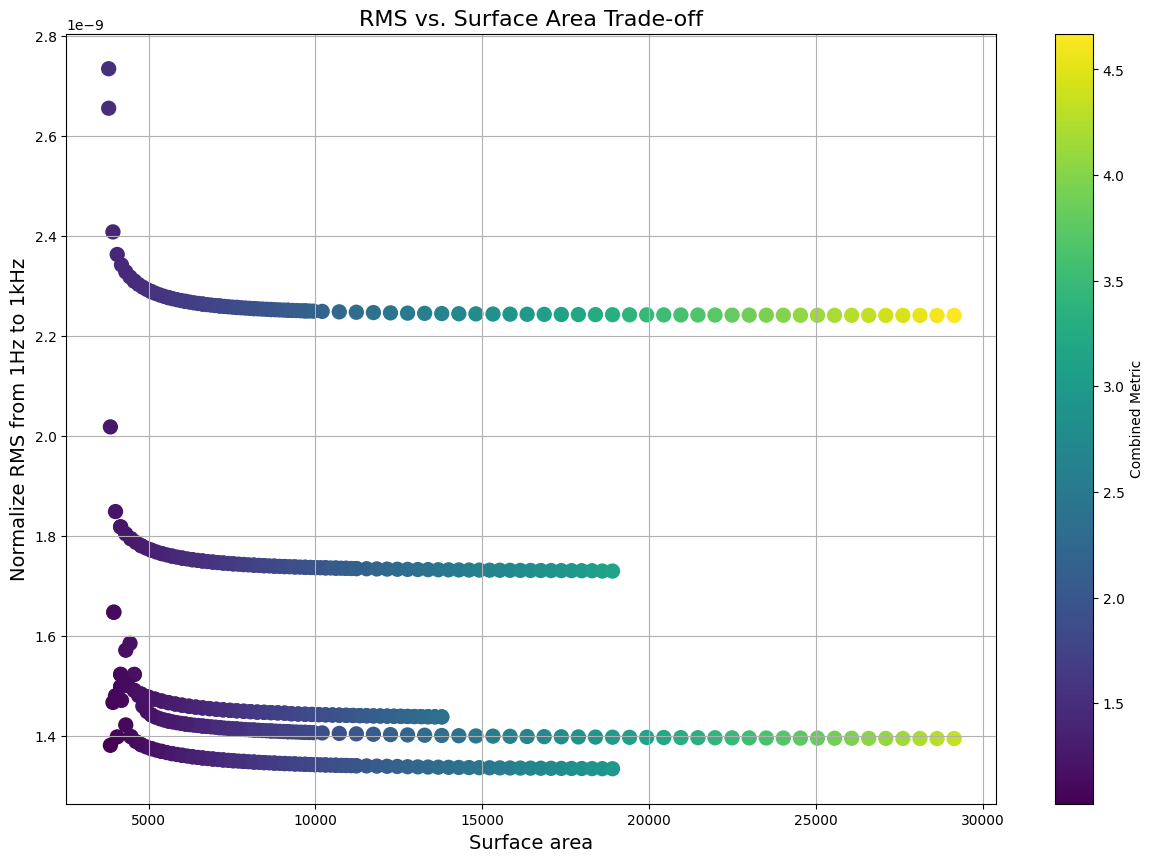

In [147]:
# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(area, RMS, c=combined_metric, cmap='viridis', s=100)
plt.colorbar(scatter, label='Combined Metric')
plt.xlabel('Surface area', fontsize=14)
plt.ylabel('Normalize RMS from 1Hz to 1kHz', fontsize=14)
plt.title('RMS vs. Surface Area Trade-off', fontsize=16)

# Annotate points with rank, surface area, and original index
for i, txt in enumerate(ranked_area):
    original_index = rank_indices[i]  # Get the original index
    plt.annotate(f'{i+1} ({original_index})', 
                 (RMS[original_index], noise_10MHz_norm[original_index]), 
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
# plt.xlim(1,2)
plt.grid(True)
plt.show()


2. Calculate from 1 to 100Hz 

In [148]:
RMS_1_1100 = [[], [], [], [], []]
RMS_2_1100 = [[], [], [], [], []]
size1 = 245

for i in range(5):
    for j in range(size1):
        try:
            index = 1 + i + j * 5
            # Assuming the first column (index 0) is frequency in both DataFrames
            RMS_1_1100[i].append(integral(noise_1[0][0:200], noise_1[index][0:200]))  
            RMS_2_1100[i].append(integral(noise_2[0][0:200], noise_2[index][0:200])) 

        except (IndexError, KeyError) as e:
            print(f"Error accessing data: {e}")
            break
RMS_1100 = np.array([RMS_1_1100,RMS_2_1100]).flatten()

Error accessing data: 246
Error accessing data: 247
Error accessing data: 248
Error accessing data: 249
Error accessing data: 250


In [149]:
# RMS_11000 = np.array([RMS_1_11000,RMS_2_11000]).flatten()
# plt.figure(figsize = (15,10))
# for i in range(5):
#     plt.scatter(A1[i], RMS_1_11000[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
#     plt.scatter(A2[i], RMS_2_11000[i],color = colors[i], marker = "^",  label = f'M = {M[i]}')
#     # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
# plt.grid(which='both', linestyle=':', linewidth='0.5')
# plt.ylabel(r'$RMS^2$ ($A^2$)', fontsize=16)
# plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# # plt.xticks(nnpn, fontsize = 16)
# plt.yticks(fontsize = 16)
# # plt.legend(fontsize = 16, loc = 'upper right')
# plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1)) 
# plt.title('mean square current vs surface area measured at 1Hz',fontsize = 18)
# # # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# # plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
# plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

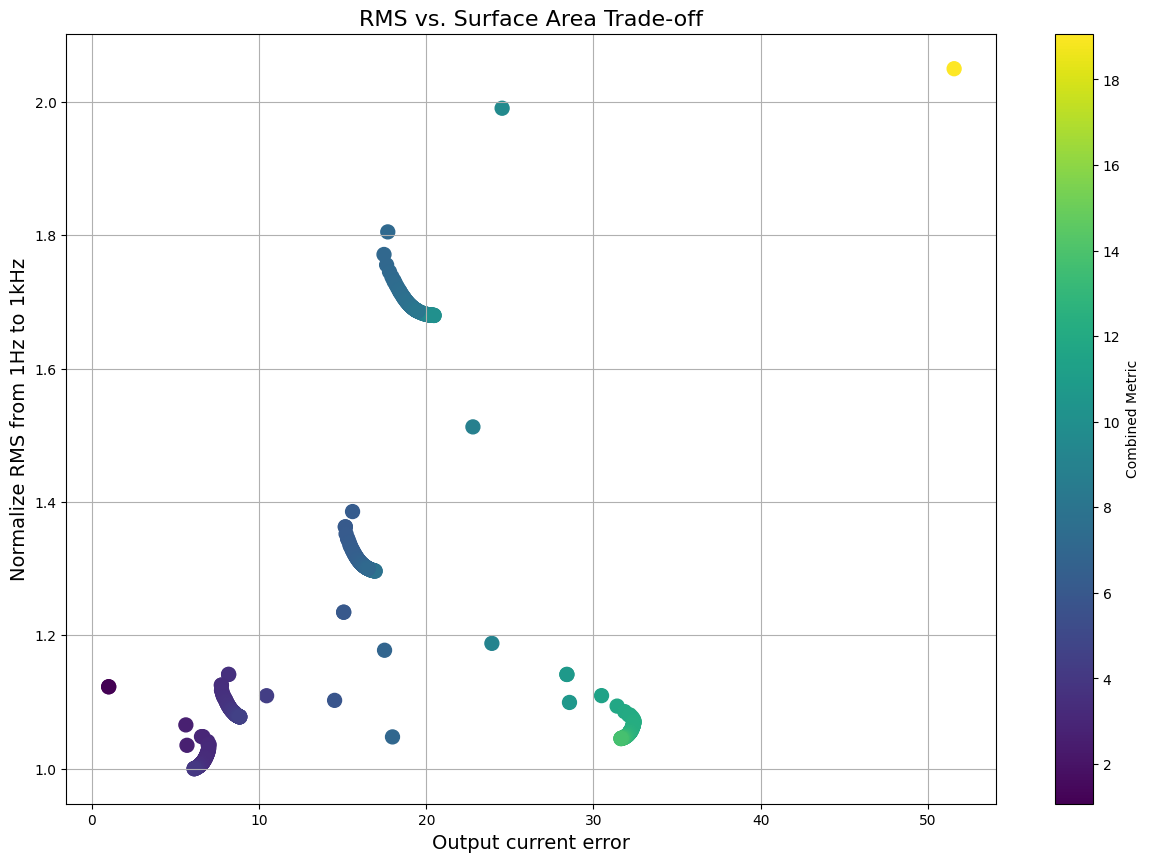

Ranked Data:
The best-ranked solution is at index: 51
Rank 1 (Index: 51): RMS = 1.50e-09 A, normalise_RMS = 1.12e+00, Area = 4163.5 um^2, normalised area = 1.1
Rank 2 (Index: 294): RMS = 1.50e-09 A, normalise_RMS = 1.12e+00, Area = 4163.5 um^2, normalised area = 1.1
Rank 3 (Index: 49): RMS = 1.38e-09 A, normalise_RMS = 1.04e+00, Area = 3856.4 um^2, normalised area = 1.0
Rank 4 (Index: 52): RMS = 1.42e-09 A, normalise_RMS = 1.07e+00, Area = 4317.1 um^2, normalised area = 1.1
Rank 5 (Index: 295): RMS = 1.40e-09 A, normalise_RMS = 1.05e+00, Area = 4470.6 um^2, normalised area = 1.2
Rank 6 (Index: 53): RMS = 1.40e-09 A, normalise_RMS = 1.05e+00, Area = 4470.6 um^2, normalised area = 1.2
Rank 7 (Index: 54): RMS = 1.39e-09 A, normalise_RMS = 1.04e+00, Area = 4624.2 um^2, normalised area = 1.2
Rank 8 (Index: 296): RMS = 1.38e-09 A, normalise_RMS = 1.04e+00, Area = 4777.7 um^2, normalised area = 1.3
Rank 9 (Index: 56): RMS = 1.38e-09 A, normalise_RMS = 1.03e+00, Area = 4931.3 um^2, normalised 

In [161]:
# Normalize the data
RMS_1100 = np.sqrt(RMS)
RMS_norm = RMS / np.min(RMS)

err = np.abs(np.abs(Iout) - 1)
err_norm = err / np.min(err)
# Calculate the combined metric (weighted sum)
w1 = 0.35
w2 = 0.35
w3 = 0.3 
combined_metric = w1 * RMS_norm + w2 * err_norm + w3 * area_norm

# Rank the data points (lower is better)
rank_indices = np.argsort(combined_metric)
ranked_RMS = RMS[rank_indices]
ranked_err = err[rank_indices]
ranked_area = area[rank_indices]
ranked_metric = combined_metric[rank_indices]

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(err_norm, RMS_norm, c=combined_metric, cmap='viridis', s=100)
plt.colorbar(scatter, label='Combined Metric')
plt.xlabel('Output current error', fontsize=14)
plt.ylabel('Normalize RMS from 1Hz to 1kHz', fontsize=14)
plt.title('RMS vs. Surface Area Trade-off', fontsize=16)

# # Annotate points with rank, surface area, and original index
# for i, txt in enumerate(ranked_area):
#     original_index = rank_indices[i]  # Get the original index
#     # plt.annotate(f'{i+1} ({original_index})', 
#                  (RMS[original_index], noise_10MHz_norm[original_index]), 
#                  textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
# plt.xlim(1,2)
plt.grid(True)
plt.show()

# Print ranked data with original index
print("Ranked Data:")
best_index = rank_indices[0]  # Get the original index of the best-ranked solution
print(f"The best-ranked solution is at index: {best_index}")

for i in range(len(ranked_metric)):
    original_index = rank_indices[i]
    print(f"Rank {i+1} (Index: {original_index}): RMS = {ranked_RMS[i]:.2e} A, normalise_RMS = {(ranked_RMS[i]/min(RMS)):.2e}, Area = {ranked_area[i]:.1f} um^2, normalised area = {(ranked_area[i]/(min(area))):.1f}")

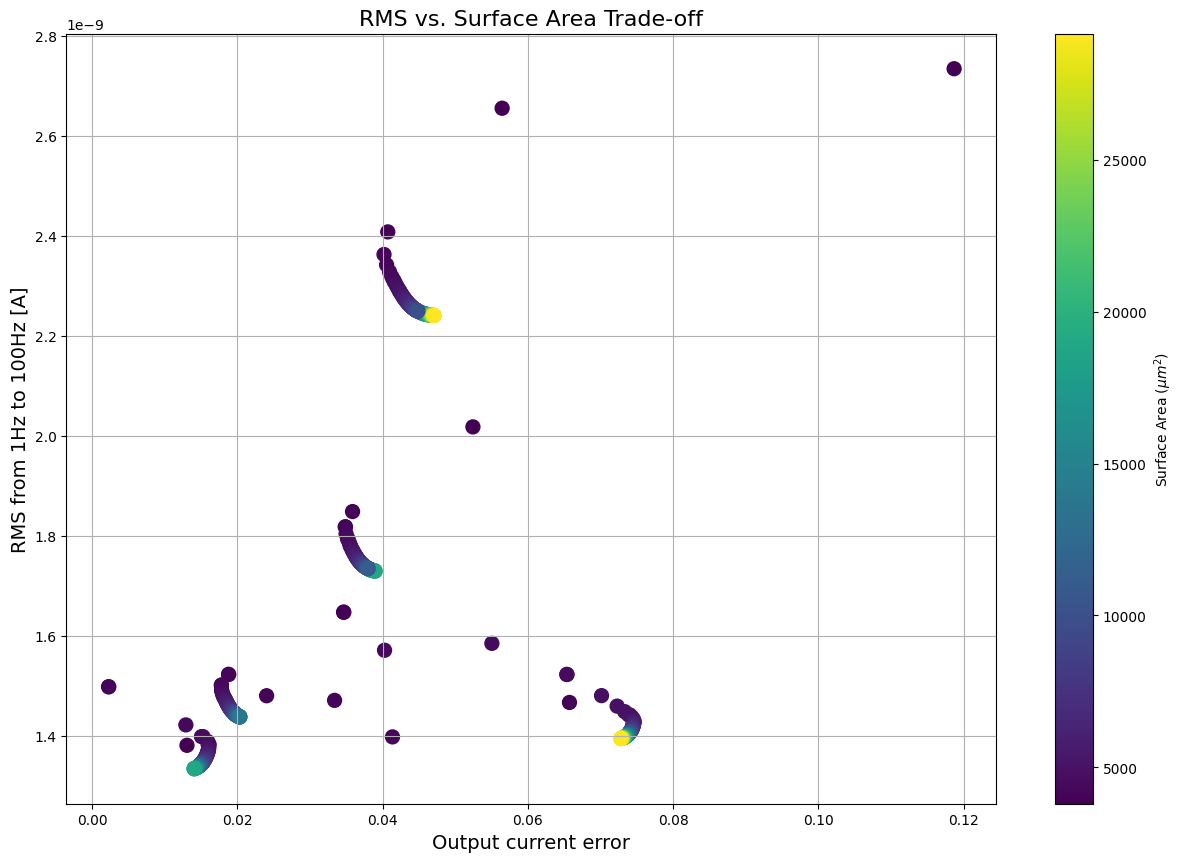

In [157]:

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(np.abs(np.abs(Iout) - 1), RMS, c=area, cmap='viridis', s=100)
plt.colorbar(scatter, label='Surface Area ($\mu m^2$)')
plt.xlabel('Output current error', fontsize=14)
plt.ylabel('RMS from 1Hz to 100Hz [A]', fontsize=14)
plt.title('RMS vs. Surface Area Trade-off', fontsize=16)


# plt.xlim(1,2)
plt.grid(True)
plt.show()



In [ ]:

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(area, RMS, c=combined_metric, cmap='viridis', s=100)
plt.colorbar(scatter, label='Combined Metric')
plt.xlabel('Surface area', fontsize=14)
plt.ylabel('RMS from 1Hz to 100Hz [A]', fontsize=14)
plt.title('RMS vs. Surface Area Trade-off', fontsize=16)


# plt.xlim(1,2)
plt.grid(True)
plt.show()



In [ ]:
# to check exactly the case of the index 
M = [0.25,0.5,1,2,4]
nnpn = np.arange(8,200,4)
def analyze_index(index, M, N):
    """
    Analyzes an index and prints corresponding information based on its value.

    Args:
      index: The input index.
      M: A known array of M values.
      N: A known array of N values.
    """

    index += 1  # Add 1 to the index
    

    if index < 246:
        print("Case 1")
        M_value = M[index // 49]  
        b = index - ((index // 49) * 49)  # Calculate b for Case 1
        print(f'M = {M_value}')
        print(f'nnpn = {nnpn[int(b) - 1]}')  # Adjust index for nnpn (0-based)
        print(' |                  | ')
        print(' |                  | ')
        print(' |                  | ')
        print('  \|               |/ ')
        print('   |-------|-------|  ')
        print('  /|       |       |\ ')
        print(' |_________|         | ')
        print(' |                   | ')
        print(' |                   | ')
        print(f' |   {nnpn[int(b) - 1]}   :    {int(M_value*nnpn[int(b) - 1])}     | ')
    else:
        print("Case 2")
        M_value = M[(index - 245) // 49]
        b = index - 245 - ((index - 245) // 245) * 49  # Calculate b for Case 2
        print(f'M = {M_value}')
        print(f'nnpn = {nnpn[int(b) - 1]}')  # Adjust index for nnpn (0-based)
        print(' |                   | ')
        print(' |                   | ')
        print(' |                   | ')
        print('  \|               |/ ')
        print('   |-------|-------|  ')
        print('  /|       |       |\ ')
        print(' |_________|         | ')
        print(' |                   | ')
        print(' |                   | ')
        print(f' |   {int(nnpn[int(b) - 1]/M_value)}   :    {nnpn[int(b) - 1]}    | ')
  

analyze_index(400,M,nnpn)

In [ ]:
M = [0.25, 0.5, 1, 2, 4]
nnpn = np.arange(8, 200, 4)

def analyze_index(index, M, N):
    """
    Analyzes an index and prints corresponding information based on its value.

    Args:
      index: The input index.
      M: A known array of M values.
      N: A known array of N values.
    """

    index += 1  # Add 1 to the index

    if index < 246:
        print("Case 1")
        M_value = M[index // 49]  
        b = index - ((index // 49) * 49)  # Calculate b for Case 1
        print(f'M = {M_value}')
        print(f'nnpn = {nnpn[int(b) - 1]}')  # Adjust index for nnpn (0-based)
        print(' |                    | ')
        print(' |                    | ')
        print(' |                    | ')
        print('  \|                  |/ ')
        print('   |-------|-------|  ')
        print('  /|        |        |\ ')
        print(' |_________|________| ')
        print(' |                    | ')
        print(' |                    | ')
        print(f' |   {nnpn[int(b) - 1]}    :   {int(M_value * nnpn[int(b) - 1])}     | ')
    else:
        print("Case 2")
        print((index - 245) // 49)
        M_value = M[(index - 245) // 49 -1]
        
        # Corrected calculation of b for Case 2
   
        b = index - 245 - ((index - 245) // 49) * 49  
        
        print(f'M = {M_value}')
        print(f'nnpn = {nnpn[int(b) - 1]}')
        print(' |                    | ')
        print(' |                    | ')
        print(' |                    | ')
        print('  \|                  |/ ')
        print('   |-------|-------|  ')
        print('  /|        |        |\ ')
        print(' |_________|________| ')
        print(' |                    | ')
        print(' |                    | ')
        print(f' |   {int(nnpn[int(b) - 1] / M_value)}    :   {nnpn[int(b) - 1]}     | ')

# Test with index = 489
analyze_index(49, M, nnpn)

In [ ]:
index = 489
index - 245 - ((index - 245) // 49) * 49